# Install & Import Libraries

In [ ]:
!pip install leia-br
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
# kaggle
import kagglehub

# core libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

# Set color palette for Seaborn
colors = ["#26536f", "#3b96b7", "#749ca8", "#b6a98d", "#c78a4d", "#854927"]
sns.set_palette(colors)

# Text Processing Libraries
import string
import calendar
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk import ngrams

# Sentiment Analysis
from LeIA import SentimentIntensityAnalyzer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Import Dataset from Kaggle

In [ ]:
# # import manually translated data
df_review_2 = pd.read_csv('/content/Final_translated.csv')

In [ ]:
# Download datasets' latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

100%|██████████| 42.6M/42.6M [00:00<00:00, 141MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [ ]:
data = pd.read_csv(f"{path}/olist_orders_dataset.csv")

# Reading files into DataFrames
df_items = pd.read_csv(f"{path}/olist_order_items_dataset.csv")
# df_reviews = pd.read_csv('/content/Final_translated.csv')
df_reviews = pd.read_csv('/content/Final_translated.csv') # translated
df_orders = pd.read_csv(f"{path}/olist_orders_dataset.csv")
df_products = pd.read_csv(f"{path}/olist_products_dataset.csv")
df_geolocation = pd.read_csv(f"{path}/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv(f"{path}/olist_sellers_dataset.csv")
df_payments = pd.read_csv(f"{path}/olist_order_payments_dataset.csv")
df_customers = pd.read_csv(f"{path}/olist_customers_dataset.csv")
df_category = pd.read_csv(f"{path}/product_category_name_translation.csv")

In [ ]:
# Merging Dataframes
df = df_orders.merge(df_items, on='order_id', how='inner')
df = df.merge(df_payments, on='order_id', how='inner', validate='m:m')
df = df.merge(df_reviews, on='order_id', how='inner')
df = df.merge(df_products, on='product_id', how='inner')
df = df.merge(df_customers, on='customer_id', how='inner')
df = df.merge(df_sellers, on='seller_id', how='inner')
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2017-11-22 13:39:59           2017-12-02 00:28:42   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2017-10-18 00:00:00              1   
2           2017-10-18 00:00:00              1   
3           2018-08-13 00:00:00              1   
4           2017-12-15 00:00:00              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-10-06 11:07:15   29.99           8.72                   1   
1  2017-10-06 11:07:15   29.99           8.72                   3   
2  2017-10-06 11:07:15   29.99           8.72                   2   
3  2018-07-30 03:24:27  118.70          22.76                   1   
4  2017-11-23 19:45:59   45.00          27.20                   1   

  payment_type  payment_installments  payment_value  Unnamed: 0  \
0  credit_card                     1          18.12       13646   
1      voucher                     1           2.00       13646   
2      voucher                     1          18.59       13646   
3       boleto                     1         141.46       12152   
4  credit_card                     1          72.20       11580   

                          review_id  review_score review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114             4                  NaN   
1  a54f0611adc9ed256b57ede6b6eb5114             4                  NaN   
2  a54f0611adc9ed256b57ede6b6eb5114             4                  NaN   
3  8d5266042046a06655c8db133d120ba5             4     Muito boa a loja   
4  359d03e676b3c069f62cadba8dd3f6e8             5                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3                               Muito bom o produto.  2018-08-08 00:00:00   
4  O produto foi exatamente o que eu esperava e e...  2017-12-03 00:00:00   

  review_answer_timestamp                  translated_review_comment_message  \
0     2017-10-12 03:43:48  I haven't tested the product yet, but it came ...   
1     2017-10-12 03:43:48  I haven't tested the product yet, but it came ...   
2     2017-10-12 03:43:48  I haven't tested the product yet, but it came ...   
3     2018-08-08 18:37:50       

In [ ]:
print(df.shape)

(49679, 41)


In [ ]:
# save merged dataset
df.to_csv('merged_df.csv', index=False)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49679 entries, 0 to 49678
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           49679 non-null  object 
 1   customer_id                        49679 non-null  object 
 2   order_status                       49679 non-null  object 
 3   order_purchase_timestamp           49679 non-null  object 
 4   order_approved_at                  49671 non-null  object 
 5   order_delivered_carrier_date       48856 non-null  object 
 6   order_delivered_customer_date      48094 non-null  object 
 7   order_estimated_delivery_date      49679 non-null  object 
 8   order_item_id                      49679 non-null  int64  
 9   product_id                         49679 non-null  object 
 10  seller_id                          49679 non-null  object 
 11  shipping_limit_date                49679 non-null  obj

In [ ]:
# show null values in the dataset
total_rows = df.shape[0]
null_sum = df.isnull().sum()
null_percentage = (null_sum / total_rows) * 100
null_info = pd.concat([null_sum, null_percentage], axis=1, keys=['null_values', 'null_percentage'])

null_info

null_values  null_percentage
order_id                                     0         0.000000
customer_id                                  0         0.000000
order_status                                 0         0.000000
order_purchase_timestamp                     0         0.000000
order_approved_at                            8         0.016103
order_delivered_carrier_date               823         1.656636
order_delivered_customer_date             1585         3.190483
order_estimated_delivery_date                0         0.000000
order_item_id                                0         0.000000
product_id                                   0         0.000000
seller_id                                    0         0.000000
shipping_limit_date                          0         0.000000
price                                        0         0.000000
freight_value                                0         0.000000
payment_sequential                           0         0.000000
payment_type                                 0         0.000000
payment_installments                         0         0.000000
payment_value                                0         0.000000
Unnamed: 0                                   0         0.000000
review_id                                    0         0.000000
review_score                                 0         0.000000
review_comment_title                     37734        75.955635
review_comment_message                       0         0.000000
review_creation_date                         0         0.000000
review_answer_timestamp                      0         0.000000
translated_review_comment_message          255         0.513295
product_category_name                      761         1.531834
product_name_lenght                        761         1.531834
product_description_lenght                 761         1.531834
product_photos_qty                         761         1.531834
product_weight_g                            14         0.028181
product_length_cm                           14         0.028181
product_height_cm                           14         0.028181
product_width_cm                            14         0.028181
customer_unique_id                           0         0.000000
customer_zip_code_prefix                     0         0.000000
customer_city                                0         0.000000
customer_state                               0         0.000000
seller_zip_code_prefix                       0         0.000000
seller_city                                  0         0.000000
seller_state                                 0         0.000000

# Preprocessing

In [ ]:
# Ensure timestamps are in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Create useful features from order_purchase_timestamp
df['day_of_week_int'] = df['order_purchase_timestamp'].dt.weekday + 1  # Day of week as integer (1 = Monday, etc.)
df['hour'] = df['order_purchase_timestamp'].dt.hour                    # Hour of day
df['month'] = df['order_purchase_timestamp'].dt.month                  # Month as integer
df['year'] = df['order_purchase_timestamp'].dt.year                    # Year as integer
df['date'] = df['order_purchase_timestamp'].dt.to_period('M')          # Monthly period for time series analysis

# Calculate delivery time in days
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [ ]:
# Renaming the column to correct the spelling
df.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)

# drop unused column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

# drop all columns with df['year'] = 2016 and any sales in september 2019
df = df[~((df['year'] == 2016))]
df = df[~((df['year'] == 2018) & (df['month'] == 9))]

In [ ]:
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2017-11-22 13:39:59           2017-12-02 00:28:42   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2017-10-18 00:00:00              1   
2           2017-10-18 00:00:00              1   
3           2018-08-13 00:00:00              1   
4           2017-12-15 00:00:00              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-10-06 11:07:15   29.99           8.72                   1   
1  2017-10-06 11:07:15   29.99           8.72                   3   
2  2017-10-06 11:07:15   29.99           8.72                   2   
3  2018-07-30 03:24:27  118.70          22.76                   1   
4  2017-11-23 19:45:59   45.00          27.20                   1   

  payment_type  payment_installments  payment_value  \
0  credit_card                     1          18.12   
1      voucher                     1           2.00   
2      voucher                     1          18.59   
3       boleto                     1         141.46   
4  credit_card                     1          72.20   

                          review_id  review_score review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114             4                  NaN   
1  a54f0611adc9ed256b57ede6b6eb5114             4                  NaN   
2  a54f0611adc9ed256b57ede6b6eb5114             4                  NaN   
3  8d5266042046a06655c8db133d120ba5             4     Muito boa a loja   
4  359d03e676b3c069f62cadba8dd3f6e8             5                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3                               Muito bom o produto.  2018-08-08 00:00:00   
4  O produto foi exatamente o que eu esperava e e...  2017-12-03 00:00:00   

  review_answer_timestamp                  translated_review_comment_message  \
0     2017-10-12 03:43:48  I haven't tested the product yet, but it came ...   
1     2017-10-12 03:43:48  I haven't tested the product yet, but it came ...   
2     2017-10-12 03:43:48  I haven't tested the product yet, but it came ...   
3     2018-08-08 18:37:50                                 Very good product.   
4     2017-12-05 19:21:5

In [ ]:
df.shape

(49389, 46)

# Exploratory Data Analysis

## Monthly Sales Trend

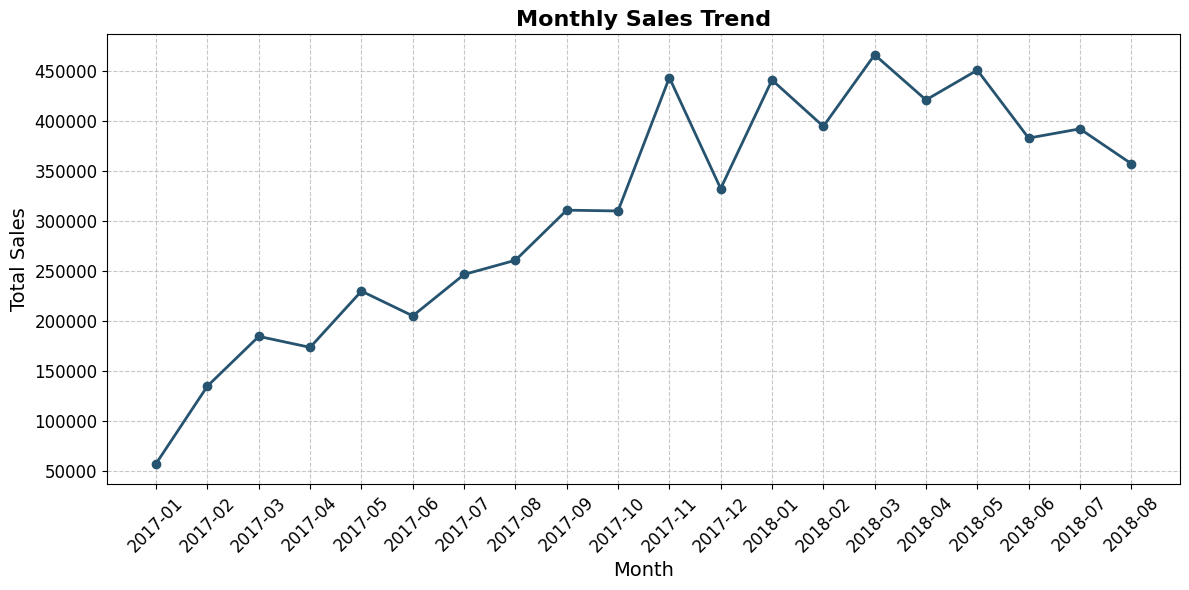

In [ ]:
# Monthly sales trend
monthly_sales = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).agg({'price': 'sum'})

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Plot the data with custom colors
plt.plot(monthly_sales.index.astype(str), monthly_sales['price'],
         marker='o', linestyle='-', color=colors[0], linewidth=2)

# Adding titles and labels
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Customize the ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Average Sales per Month

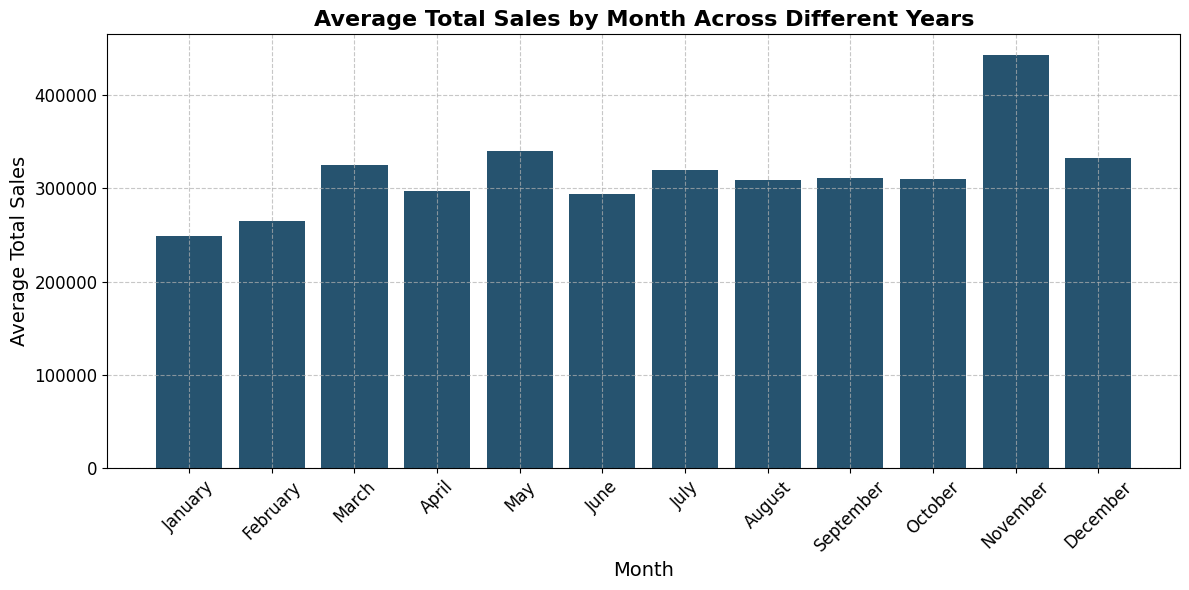

In [ ]:
# Calculate total sales for each month across different years
monthly_total_sales = df.groupby(['month', 'year']).agg({'price': 'sum'}).reset_index()

# Extract the month from the 'day_of_week_int' column
monthly_total_sales['month'] = monthly_total_sales['month']

# Calculate the average total sales for each month
average_monthly_sales = monthly_total_sales.groupby('month').agg({'price': 'mean'}).reset_index()

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a bar graph for the average total sales by month
plt.bar(average_monthly_sales['month'], average_monthly_sales['price'], color=colors[0])

# Adding titles and labels
plt.title('Average Total Sales by Month Across Different Years', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Total Sales', fontsize=14)

# Customize the ticks to display month names
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Average Sales per Day of Week

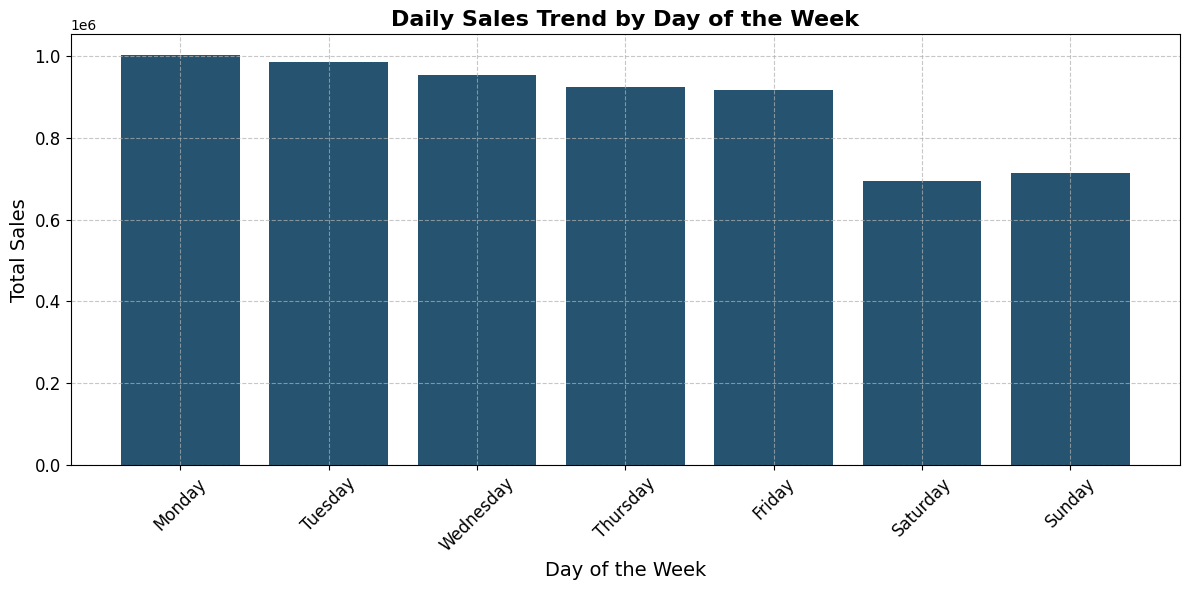

In [ ]:
# Calculate total sales for each day of the week across different dates
daily_total_sales = df.groupby('day_of_week_int').agg({'price': 'sum'}).reset_index()

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Plot the data using a bar graph
plt.bar(daily_total_sales['day_of_week_int'], daily_total_sales['price'], color=colors[0])

# Adding titles and labels
plt.title('Daily Sales Trend by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Customize the ticks
plt.xticks(range(1, 8), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Total Sales by Product Category (Bar Plot)

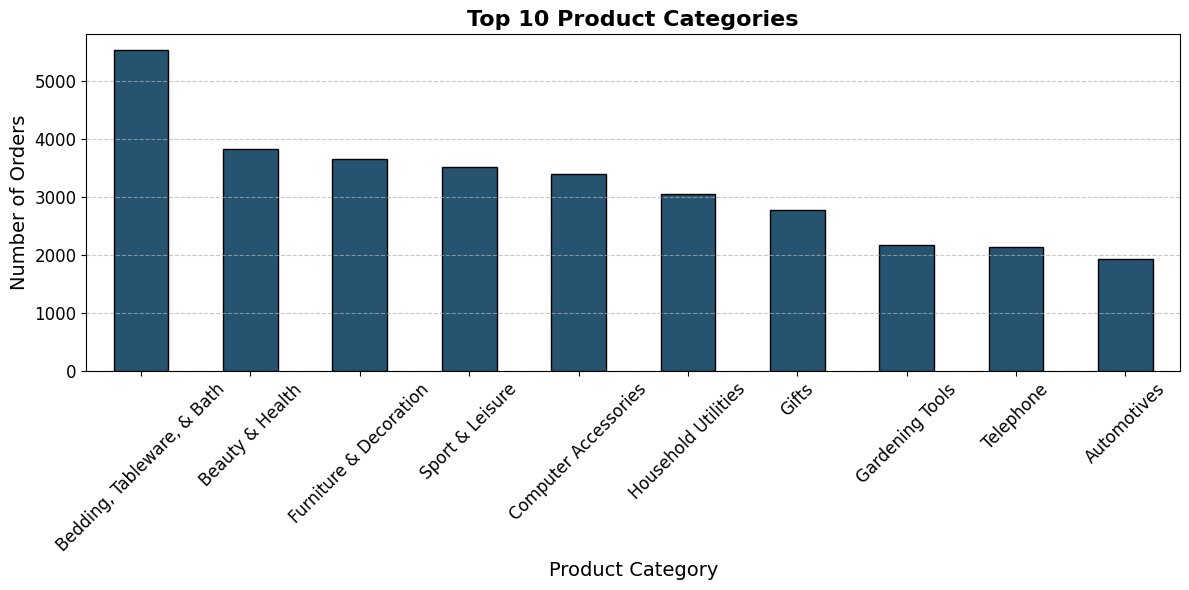

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Example: Orders by product category
top_categories = df['product_category_name'].value_counts().head(10)

# Mapping dictionary for translation
translation_map = {
    'cama_mesa_banho': 'Bedding, Tableware, & Bath',
    'beleza_saude': 'Beauty & Health',
    'moveis_decoracao': 'Furniture & Decoration',
    'esporte_lazer': 'Sport & Leisure',
    'informatica_acessorios': 'Computer Accessories',
    'utilidades_domesticas': 'Household Utilities',
    'relogios_presentes': 'Gifts',
    'ferramentas_jardim': 'Gardening Tools',
    'telefonia': 'Telephone',
    'automotivo': 'Automotives'
    # Add more translations as needed
}

# Translate the category names
top_categories.index = top_categories.index.map(translation_map)

top_categories.plot(kind='bar', color=colors[0], edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Proportion of Total Sales by Payment Type (Pie Chart)

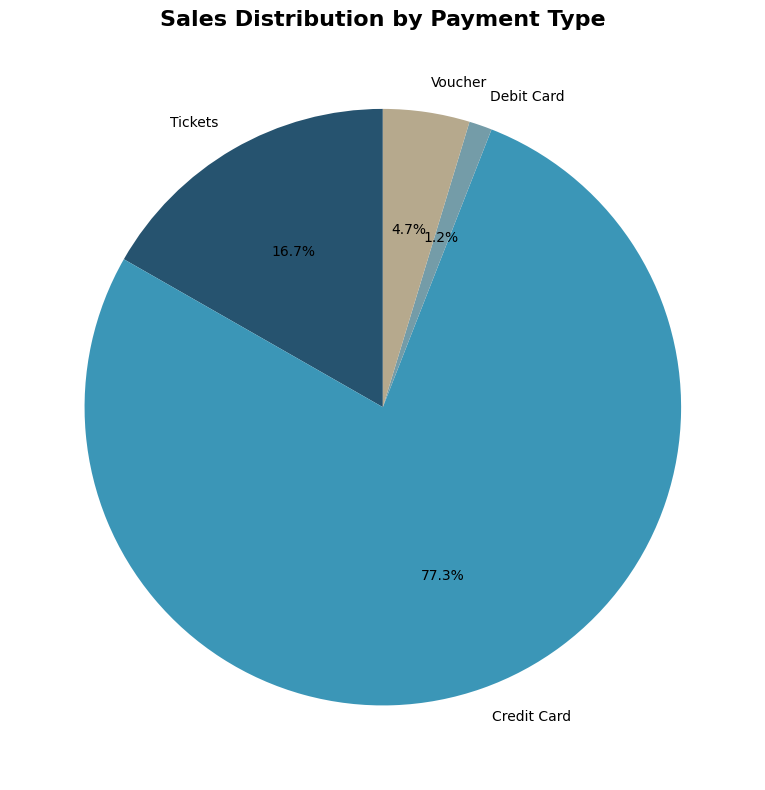

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Example: Proportion of total sales by payment type
sales_by_payment = df.groupby('payment_type')['price'].sum()

# Mapping dictionary for label changes
label_mapping = {
    'credit_card': 'Credit Card',
    'debit_card': 'Debit Card',
    'boleto': 'Tickets',
    'voucher': 'Voucher',
    # Add more mappings as needed
}

# Rename the index based on the mapping dictionary
sales_by_payment.rename(index=label_mapping, inplace=True)

sales_by_payment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Adding title
plt.title('Sales Distribution by Payment Type', fontsize=16, fontweight='bold')

# Hide the y-label for better aesthetics
plt.ylabel('')

plt.tight_layout()
plt.show()

## Distribution of Review Scores (Histogram)

*   List item
*   List item



In [ ]:
df['review_score'].value_counts()

review_score
5    23518
1    11473
4     7048
3     4481
2     2869
Name: count, dtype: int64

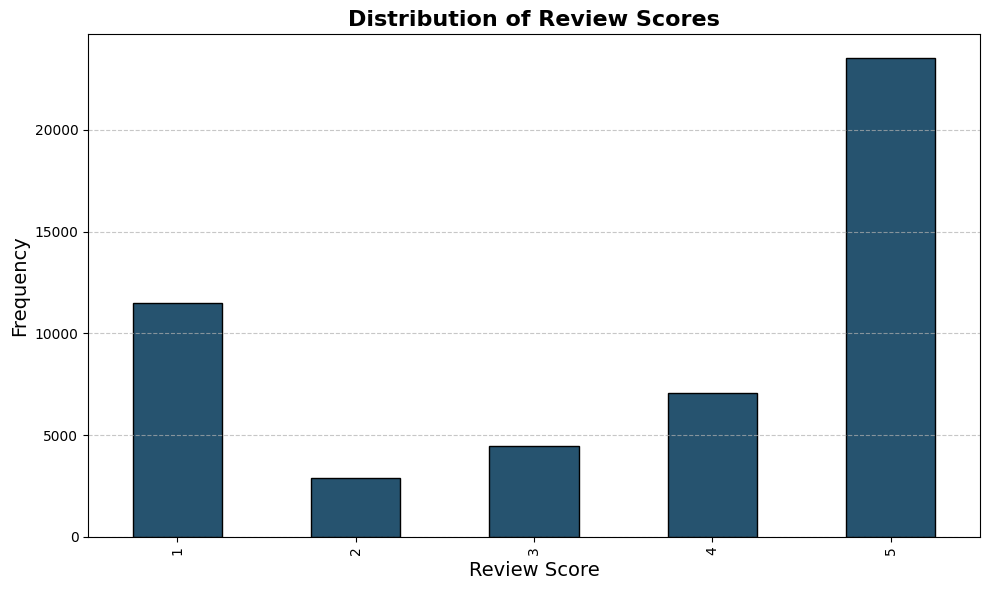

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Count the frequency of each review score
review_score_counts = df['review_score'].value_counts().sort_index()

# Plotting the bar graph
review_score_counts.plot(kind='bar', color=colors[0], edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Review Scores', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks if needed
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Correlation Heatmap

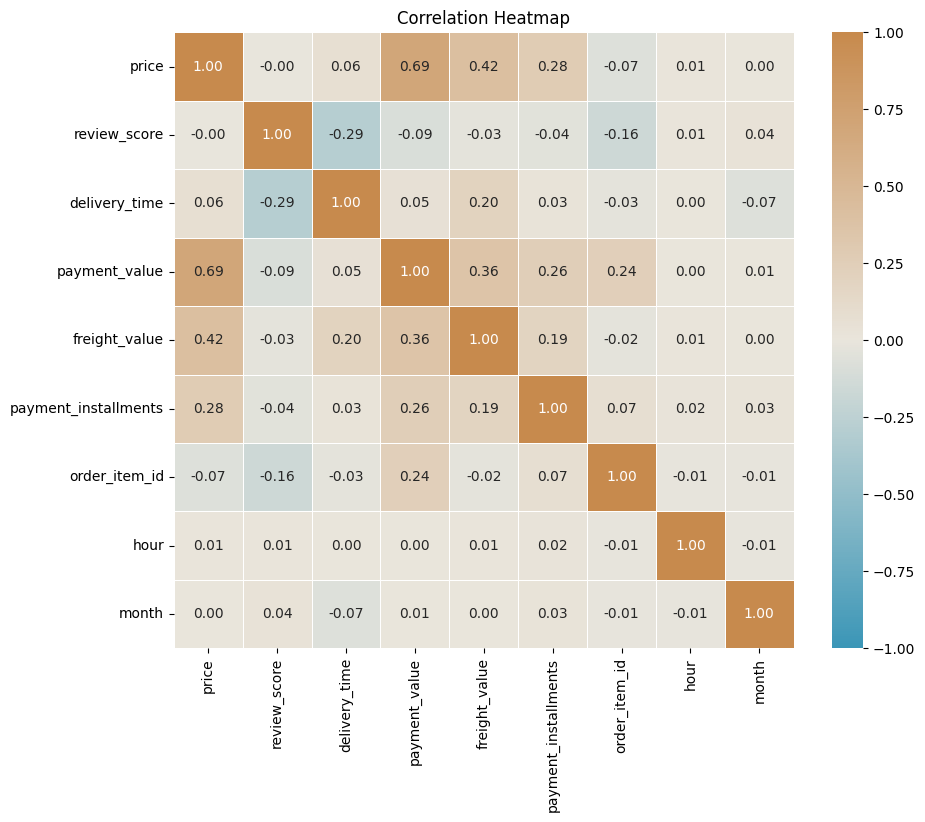

In [ ]:
# Select relevant features for correlation analysis
correlation_features = df[['price', 'review_score', 'delivery_time',
                            'payment_value', 'freight_value',
                            'payment_installments', 'order_item_id',
                            'hour', 'month']]

# Calculate the correlation matrix
correlation = correlation_features.corr()

# Define the custom colormap
custom_colors = ['#3B96B7', '#E9E5DC', '#C78A4D']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap=custom_cmap, vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Delivery Time by Product Category (Box Plot)¶

In [ ]:
# Count the occurrences of each product category
category_counts = df['product_category_name'].value_counts()
category_counts

product_category_name
cama_mesa_banho                  5532
beleza_saude                     3835
moveis_decoracao                 3658
esporte_lazer                    3516
informatica_acessorios           3388
                                 ... 
fashion_esporte                     7
cds_dvds_musicais                   5
pc_gamer                            2
seguros_e_servicos                  2
fashion_roupa_infanto_juvenil       1
Name: count, Length: 73, dtype: int64

In [ ]:
# Set a threshold to decide which categories to keep
threshold = 3000
common_categories = category_counts[category_counts >= threshold].index

# Create a new column for simplified categories
df['simplified_category'] = df['product_category_name'].where(df['product_category_name'].isin(common_categories), 'Other')

<ipython-input-30-01604890ebff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='delivery_time', y='simplified_category', data=df, palette=colors)
<ipython-input-30-01604890ebff>:4: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='delivery_time', y='simplified_category', data=df, palette=colors)


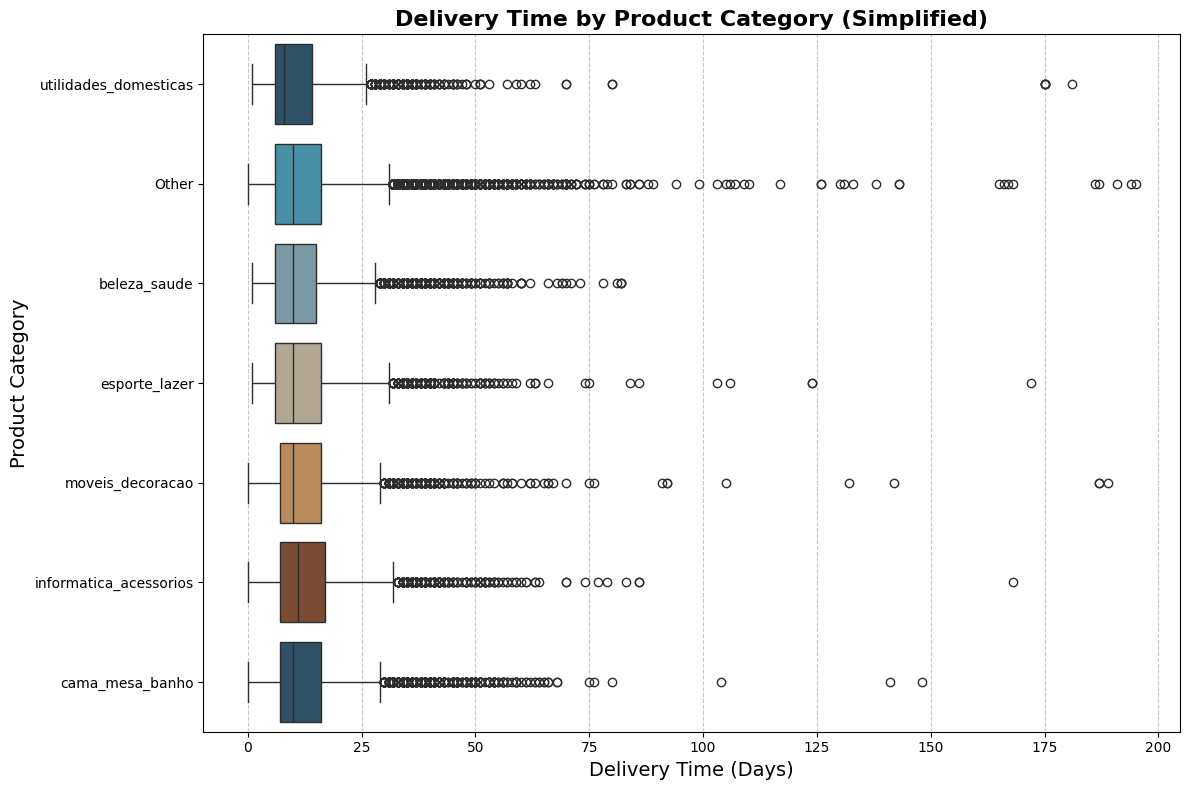

In [ ]:
plt.figure(figsize=(12, 8))

# Horizontal box plot for delivery time by simplified product category
sns.boxplot(x='delivery_time', y='simplified_category', data=df, palette=colors)

# Overlay swarm plot to show individual points
#sns.swarmplot(x='delivery_time', y='simplified_category', data=df, color='k', alpha=0.6, size=3)

# Adding titles and labels
plt.title('Delivery Time by Product Category (Simplified)', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Delivery Time by Day of the Week¶

<ipython-input-31-2d9121d8af2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='day_of_week_int', y='delivery_time', palette=colors)
<ipython-input-31-2d9121d8af2c>:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='day_of_week_int', y='delivery_time', palette=colors)


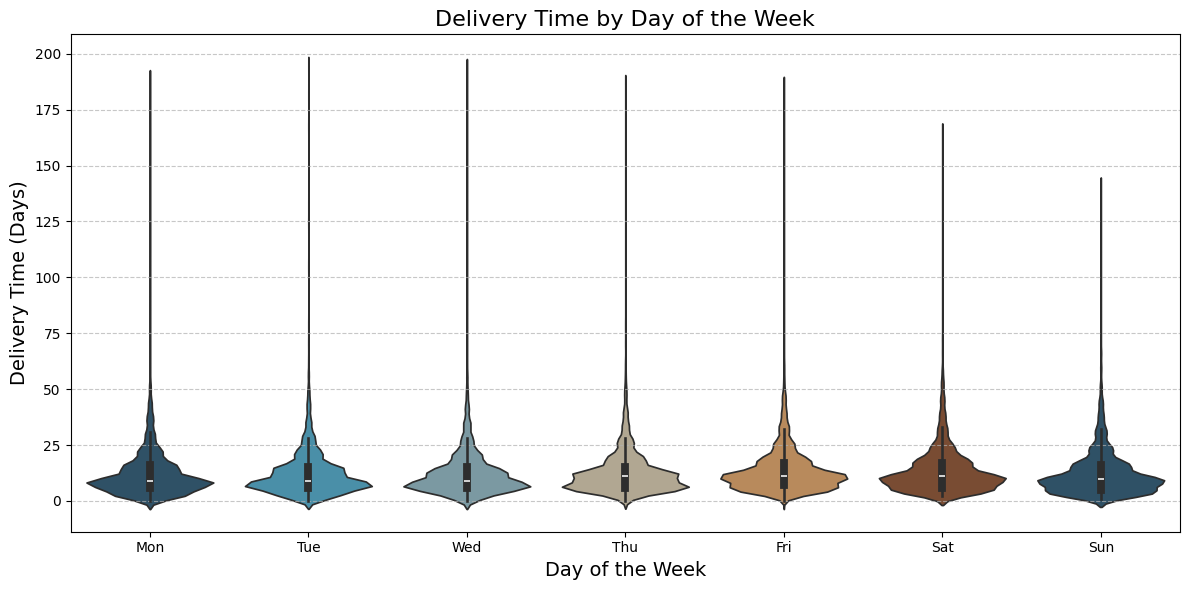

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='day_of_week_int', y='delivery_time', palette=colors)
plt.title('Delivery Time by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Delivery Time (Days)', fontsize=14)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Average Delivery Time by Month¶


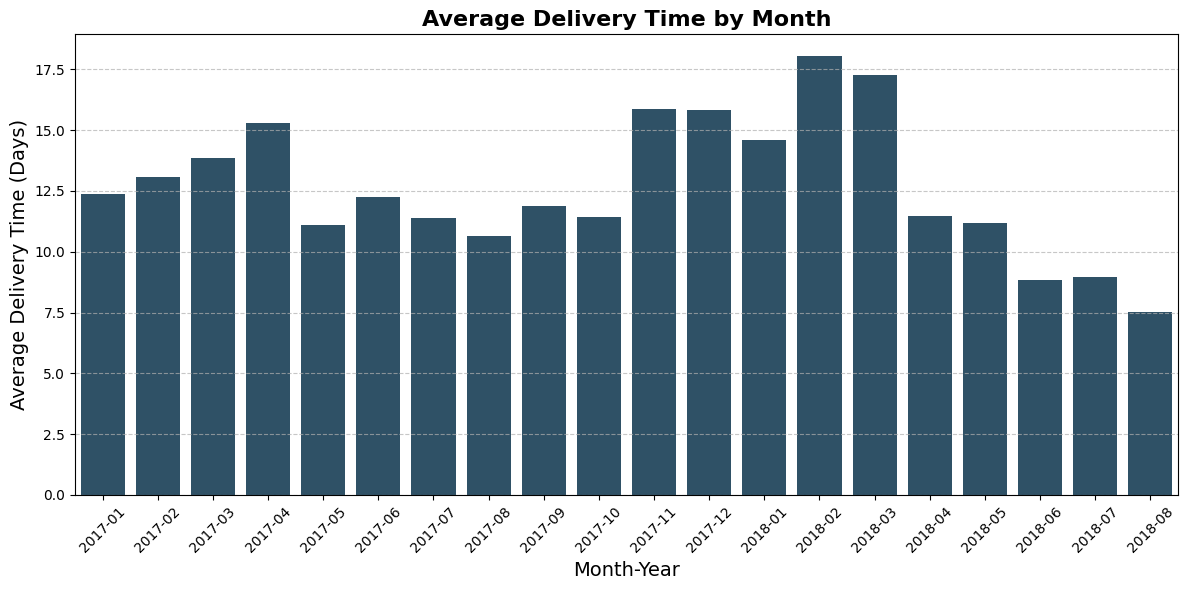

In [ ]:
# Create a new DataFrame for the monthly average delivery time
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_delivery_time = df.groupby('month_year')['delivery_time'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month_year', y='delivery_time', data=monthly_delivery_time, color=colors[0])
plt.title('Average Delivery Time by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Average Delivery Time (Days)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Word Cloud of Review Comments

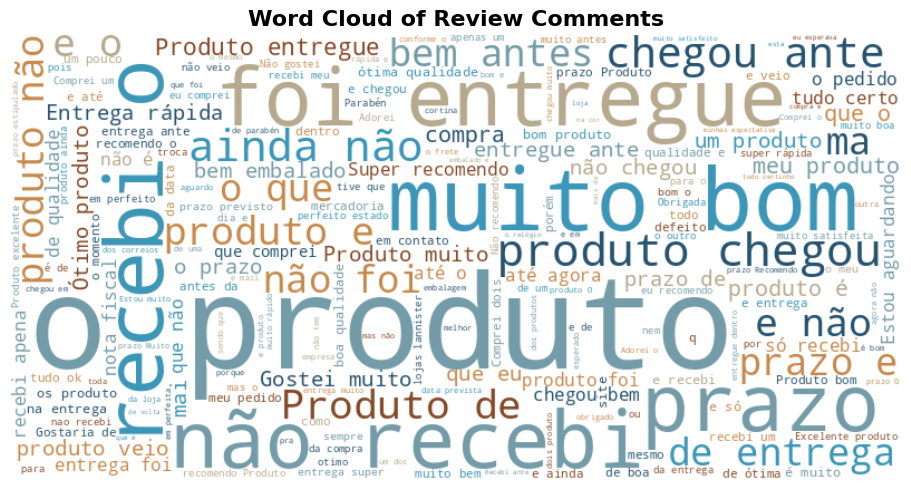

In [ ]:
# Define a color function
def color_func(word, font_size, position, orientation, random_state=42, **kwargs):
    return random.choice(colors)

# Example: Word cloud from review comments
plt.figure(figsize=(10, 5))

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(' '.join(df['review_comment_message'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Review Comments', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Natural Language Processing (NLP)

In [ ]:
# Selecting only necessary columns for NLP analysis
nlp_df = df[['review_comment_title', 'review_comment_message', 'product_category_name']]

In [ ]:
# dataset
nlp_df

review_comment_title                             review_comment_message  \
0                      NaN  Não testei o produto ainda, mas ele veio corre...   
1                      NaN  Não testei o produto ainda, mas ele veio corre...   
2                      NaN  Não testei o produto ainda, mas ele veio corre...   
3         Muito boa a loja                               Muito bom o produto.   
4                      NaN  O produto foi exatamente o que eu esperava e e...   
...                    ...                                                ...   
49674                  NaN  Ele não é um mini cajon, é um shaker, ou seja,...   
49675                  NaN       So uma peça que veio rachado mas tudo bem rs   
49676                  NaN                       Foi entregue antes do prazo.   
49677                  NaN  Foi entregue somente 1. Quero saber do outro p...   
49678                  NaN  Foi entregue somente 1. Quero saber do outro p...   

        product_category_name  
0       utilidades_domesticas  
1       utilidades_domesticas  
2       utilidades_domesticas  
3                  perfumaria  
4                    pet_shop  
...                       ...  
49674   instrumentos_musicais  
49675                   bebes  
49676      eletrodomesticos_2  
49677  informatica_acessorios  
49678  informatica_acessorios  

[49389 rows x 3 columns]

In [ ]:
nlp_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49389 entries, 0 to 49678
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_title    11945 non-null  object
 1   review_comment_message  49389 non-null  object
 2   product_category_name   48629 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [ ]:
print("There are {} product categories in the dataset.".format(nlp_df.product_category_name.nunique()))

There are 73 product categories in the dataset.


# Data Cleaning

In [ ]:
# Calculating the total number of NaN values in each column of the DataFrame 'nlp_df'
nan_counts = nlp_df.isna().sum()
nan_counts

review_comment_title      37444
review_comment_message        0
product_category_name       760
dtype: int64

In [ ]:
# Calculating the total number of NaN values in the 'review_comment_message' column of 'nlp_df'
nan_count_review_comment_message = nlp_df['review_comment_message'].isna().sum()
nan_count_review_comment_message

0

In [ ]:
def remove_duplicates_nlp_df(nlp_df, column_name='review_comment_message'):

    # Remove duplicates based on the specified column, keeping the first occurrence
    nlp_df = nlp_df.drop_duplicates(subset=[column_name], keep='first').reset_index(drop=True)

    # Display the total entries after removing duplicates
    print(f"Total entries after removing duplicates in '{column_name}': {nlp_df.shape[0]}")

    return nlp_df

# Remove duplicates from 'nlp_df' based on the 'review_comment_message' column
nlp_df = remove_duplicates_nlp_df(nlp_df, 'review_comment_message')

# Display the first few records to verify
nlp_df.head()

Total entries after removing duplicates in 'review_comment_message': 35487


review_comment_title                             review_comment_message  \
0                  NaN  Não testei o produto ainda, mas ele veio corre...   
1     Muito boa a loja                               Muito bom o produto.   
2                  NaN  O produto foi exatamente o que eu esperava e e...   
3                  NaN               fiquei triste por n ter me atendido.   
4                  NaN                         Aguardando retorno da loja   

   product_category_name  
0  utilidades_domesticas  
1             perfumaria  
2               pet_shop  
3                    NaN  
4     ferramentas_jardim

In [ ]:
def clean_reviews(df):

    # Remove rows where 'review_comment_message' is empty
    df = df.dropna(subset=['review_comment_message', 'review_comment_title', 'product_category_name']).reset_index(drop=True)

    # Remove duplicate rows
    df = df.drop_duplicates(subset=['review_comment_message'])

    return df

# Assuming 'nlp_df' is your dataframe
df_cleaned = clean_reviews(nlp_df)

# Display the first records to check
df_cleaned.head()

review_comment_title                             review_comment_message  \
0     Muito boa a loja                               Muito bom o produto.   
1             Nota dez  Obrigado pela atenção. Lojas lannister perfeit...   
2               Ótimo   Sempre vou comprar aqui pois é a melhor parabéns    
3   NÃO RECOMENDO!!!!   Até o momento não recebi o produto Protetor De...   
4          Enganadores  Foi entregue um produto divergente do que eu h...   

  product_category_name  
0            perfumaria  
1            perfumaria  
2             papelaria  
3                 bebes  
4          climatizacao

# Text Preprocessing

In [ ]:
# Define Portuguese stopwords
STOP_WORDS = set(stopwords.words('portuguese'))

# Helper function to clean and tokenize text
def clean_and_tokenize(text):
    # Ensure the text is a string
    if not isinstance(text, str):
        return "", []

    # Convert to lowercase, remove punctuation, and split into words
    cleaned_text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = cleaned_text.split()

    # Remove stopwords and create tokens
    filtered_words = [word for word in words if word not in STOP_WORDS]
    return " ".join(filtered_words), filtered_words

# Main function to preprocess and clean the dataframe
def preprocess_nlp_df(df):
    # Clean, remove stopwords, and tokenize comments
    df[['review_comment_message_clean', 'review_comment_message_tokens']] = df['review_comment_message'].apply(
        lambda text: pd.Series(clean_and_tokenize(text))
    )

    # Remove rows with NaN values in key columns
    df.dropna(subset=['review_comment_title', 'review_comment_message'], inplace=True)

    # Drop duplicate rows based on the 'review_comment_message' and 'review_comment_title' columns
    df.drop_duplicates(subset=['review_comment_message', 'review_comment_title'], inplace=True)

    return df.reset_index(drop=True)

# Preprocess the dataset
nlp_df = preprocess_nlp_df(nlp_df)

# Display the first records to check
nlp_df[['review_comment_message', 'review_comment_message_clean', 'review_comment_message_tokens']].head()

review_comment_message  \
0                               Muito bom o produto.   
1  Obrigado pela atenção. Lojas lannister perfeit...   
2  Sempre vou comprar aqui pois é a melhor parabéns    
3  Até o momento não recebi o produto Protetor De...   
4  Foi entregue um produto divergente do que eu h...   

                        review_comment_message_clean  \
0                                        bom produto   
1     obrigado atenção lojas lannister perfeito tudo   
2       sempre vou comprar aqui pois melhor parabéns   
3  momento recebi produto protetor colchão berço ...   
4  entregue produto divergente havia comprado alé...   

                       review_comment_message_tokens  
0                                     [bom, produto]  
1  [obrigado, atenção, lojas, lannister, perfeito...  
2  [sempre, vou, comprar, aqui, pois, melhor, par...  
3  [momento, recebi, produto, protetor, colchão, ...  
4  [entregue, produto, divergente, havia, comprad...

# Sentiment Analysis with LeIA

In [ ]:
# Initialize the Sentiment Analyzer once
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(df, column_name='review_comment_message_clean'):
    # Vectorized function to get sentiment classification
    def get_sentiment_classification(text):
        scores = analyzer.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 'Positive'
        elif scores['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    # Apply sentiment analysis using map for faster iteration
    df[f'{column_name}_sentiment'] = df[column_name].map(get_sentiment_classification)
    return df

# Classify sentiment in 'nlp_df' based on the 'review_comment_message_clean' column
nlp_df = classify_sentiment(nlp_df, 'review_comment_message_clean')

# Display the sentiment results
nlp_df[['review_comment_message_clean', 'review_comment_message_clean_sentiment']].head(25)

review_comment_message_clean  \
0                                         bom produto   
1      obrigado atenção lojas lannister perfeito tudo   
2        sempre vou comprar aqui pois melhor parabéns   
3   momento recebi produto protetor colchão berço ...   
4   entregue produto divergente havia comprado alé...   
5              produto veio bem lacrado todo original   
6   prazo entrega excelente produto cuidadosamente...   
7   recebi apenas 1 unidade solicitada deveriam 2 ...   
8                entrega antes data marcada excelente   
9   somente mala pequena bordo avião 360º viagem s...   
10  passei email solicitando suporte fazer produto...   
11  produto veio perfeitas condições chegou antes ...   
12      outros produtos loja ofereceu cumpriu entrega   
13  tudo conforme combinado entrega antes prazo fi...   
14                         recebi 22 dias antes prazo   
15  produto bonito chegou prazo correto parece tro...   
16  chegou antes prazo produto exatamente pedido q...   
17  gostei produto porem fiquei preocupada chegass...   
18                                 recebi antes prazo   
19                                                bom   
20        espero sempre assim rápido produto perfeito   
21  serviços todos ótimos porém achei fecho pouco ...   
22                   produto corresponde expectativas   
23                               recebi produto velho   
24  opinião comprei produto entregue receber notif...   

   review_comment_message_clean_sentiment  
0                                Positive  
1                                Positive  
2                                Positive  
3                                Negative  
4                                 Neutral  
5                                Positive  
6                                Positive  
7                                Negative  
8                                Positive  
9                                 Neutral  
10                                Neutral  
11                               Positive  
12                                Neutral  
13                               Positive  
14                                Neutral  
15                               Positive  
16                                Neutral  
17                               Positive  
18                                Neutral  
19                               Positive  
20                               Positive  
21                                Neutral  
22                                Neutral  
23                                Neutral  
24                                Neutral

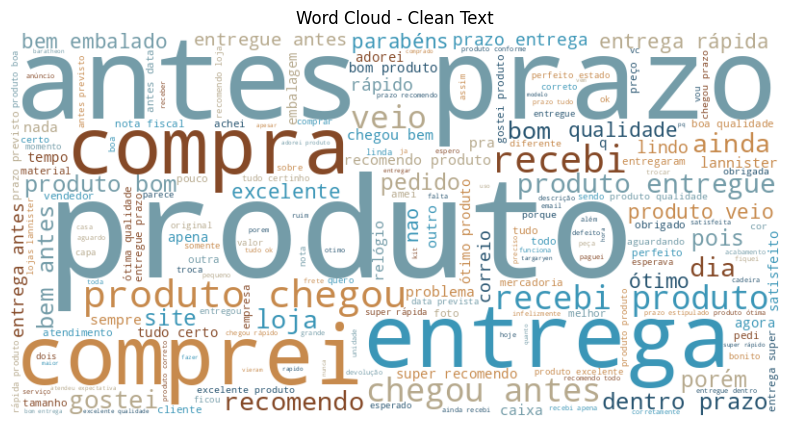

In [ ]:
# Concatenate all non-null texts from the 'cleaned_text' column into a single string
text_combined = " ".join(nlp_df['review_comment_message_clean'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Clean Text")
plt.axis("off")  # Remove the axes
plt.show()

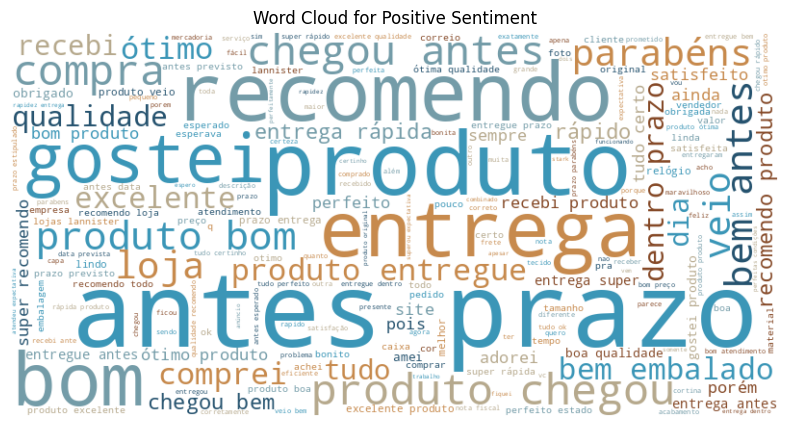

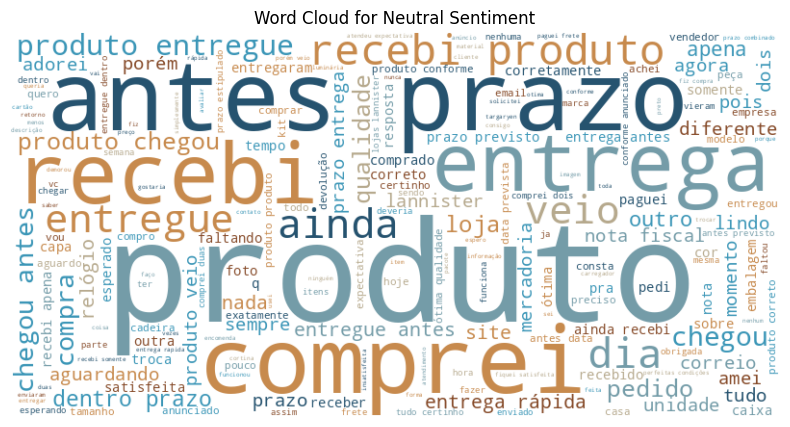

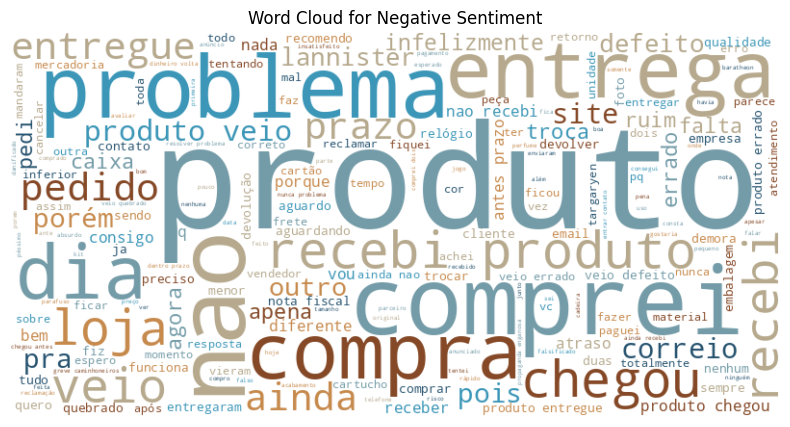

In [ ]:
def plot_word_clouds_by_sentiment(df, text_column='review_comment_message_clean', sentiment_column='review_comment_message_clean_sentiment'):
    # Filter text by sentiment
    sentiments = ['Positive', 'Neutral', 'Negative']

    for sentiment in sentiments:
        # Filter data by current sentiment
        text_data = " ".join(df[df[sentiment_column] == sentiment][text_column].dropna())

        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_data)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment} Sentiment')
        plt.show()

# Generate word clouds based on sentiment for the specified columns
plot_word_clouds_by_sentiment(nlp_df, 'review_comment_message_clean', 'review_comment_message_clean_sentiment')

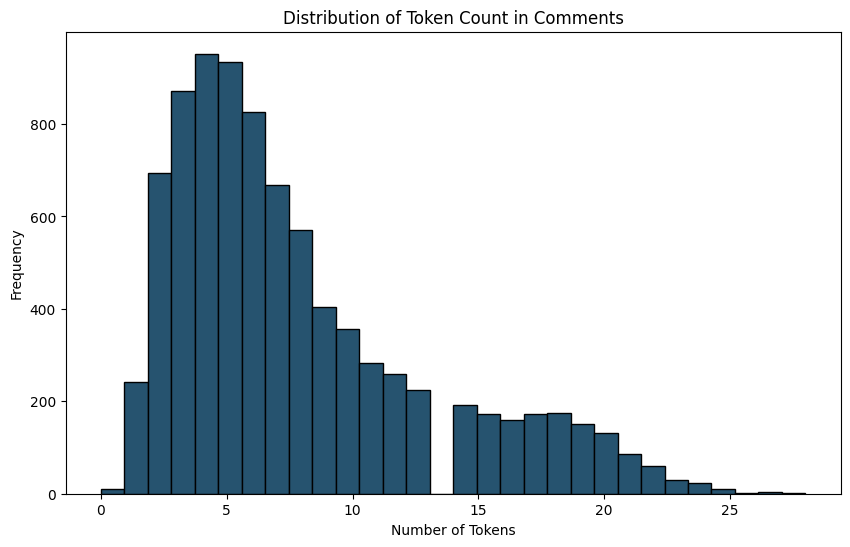

In [ ]:
def plot_token_count_distribution(df, token_column='review_comment_message_tokens'):
    # Calculate the number of tokens for each entry
    df['token_count'] = df[token_column].apply(len)

    # Plot the distribution of token counts
    plt.figure(figsize=(10, 6))
    plt.hist(df['token_count'], bins=30, edgecolor='black')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.title('Distribution of Token Count in Comments')
    plt.show()

# Generate the token count distribution plot
plot_token_count_distribution(nlp_df, 'review_comment_message_tokens')

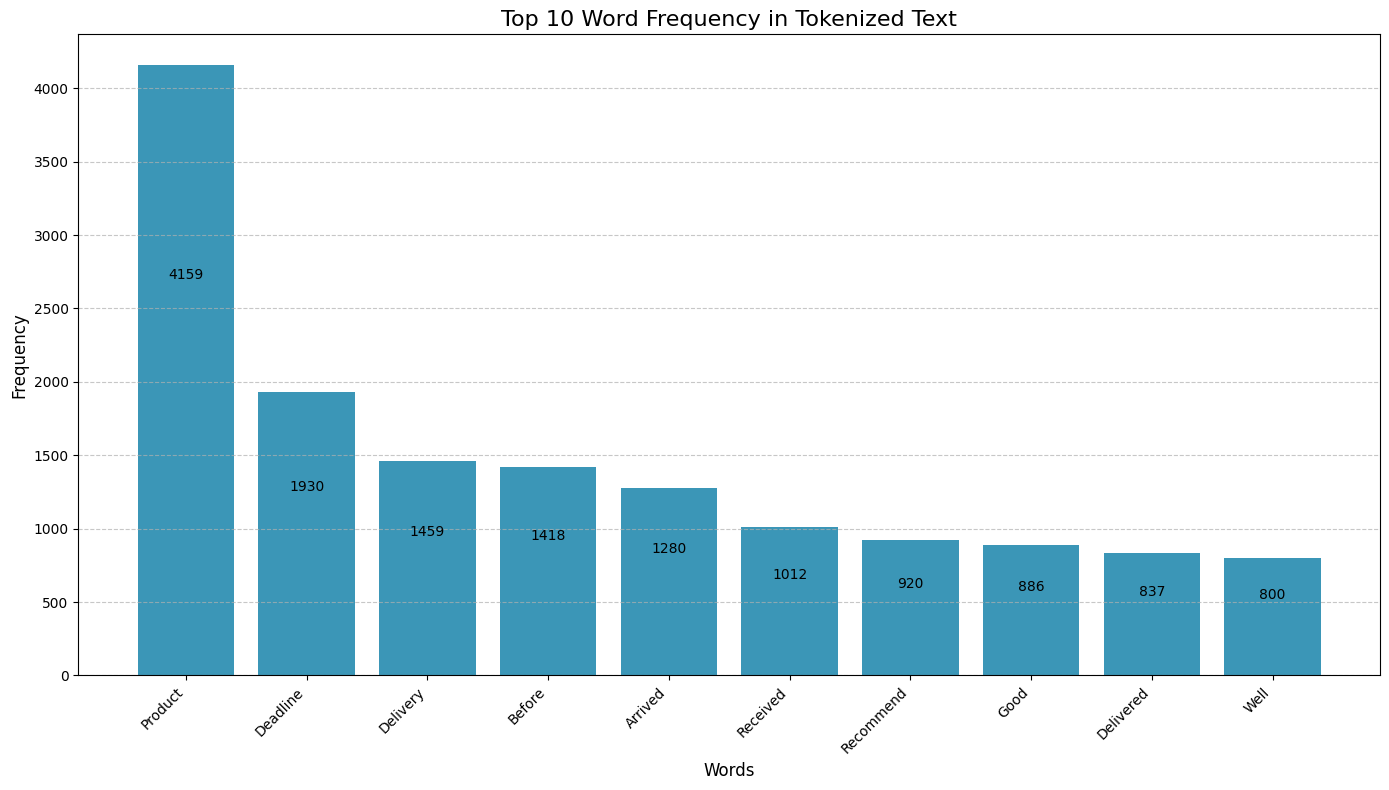

In [ ]:
# Function to get top N tokens or n-grams
def get_top_tokens(df, token_column='review_comment_message_tokens', top_n=50):
    all_tokens = [token for tokens in df[token_column] for token in tokens]
    token_counts = Counter(all_tokens)
    return token_counts.most_common(top_n)

# Function to create a DataFrame from frequency counts
def create_frequency_df(counter, columns=['Word', 'Frequency']):
    return pd.DataFrame(counter.items(), columns=columns)

# General plotting function for bar charts
def plot_top_frequencies(df, title, xlabel, column_name):
    plt.figure(figsize=(14, 8))
    bars = plt.bar(df[column_name], df['Frequency'], color=colors[1])

    # Add labels
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.35),
                 f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

    # Translate X-axis
    translated_xaxis = ['Product', 'Deadline', 'Delivery', 'Before', 'Arrived', 'Received', 'Recommend', 'Good', 'Delivered', 'Well']

    # Customize and show plot
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(ticks=range(len(df)), labels=translated_xaxis[:len(df)], rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Get top tokens and plot
top_50_tokens = get_top_tokens(nlp_df, 'review_comment_message_tokens', 50)
top_50_tokens_df = create_frequency_df(dict(top_50_tokens))
plot_top_frequencies(top_50_tokens_df.head(10), 'Top 10 Word Frequency in Tokenized Text', 'Words', 'Word')

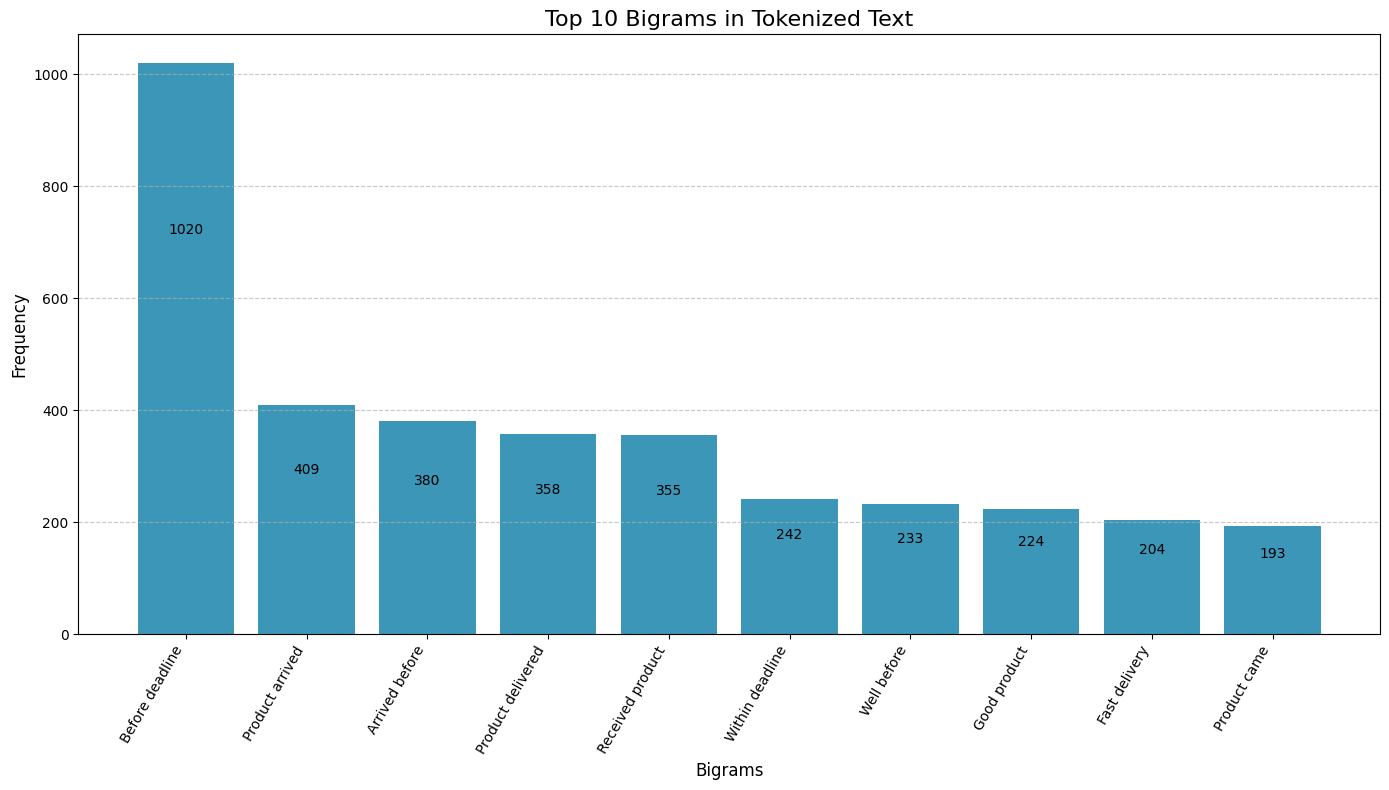

In [ ]:
# N-gram generator and frequency counter
def get_top_ngrams(tokens_list, n=2, top_n=25):
    ngram_counts = Counter(
        ngram for tokens in tokens_list if tokens for ngram in ngrams(tokens, n)
    )
    # Create DataFrame directly from the most common n-grams
    return pd.DataFrame(ngram_counts.most_common(top_n), columns=['Bigram', 'Frequency'])

# Generate top 25 bigrams and plot
top_bigrams_df = get_top_ngrams(nlp_df['review_comment_message_tokens'], n=2, top_n=10)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(
    [f'{gram[0]} {gram[1]}' for gram in top_bigrams_df['Bigram']],
    top_bigrams_df['Frequency'], color=colors[1])

# Add count labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.3),
             f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

# Translate X-axis
translated_xaxis2 = ['Before deadline', 'Product arrived', 'Arrived before', 'Product delivered', 'Received product', 'Within deadline', 'Well before', 'Good product', 'Fast delivery', 'Product came']

# Customize the chart
plt.xlabel('Bigrams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 Bigrams in Tokenized Text', fontsize=16)
plt.xticks(ticks=range(len(translated_xaxis2)), labels=translated_xaxis2, rotation=60, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

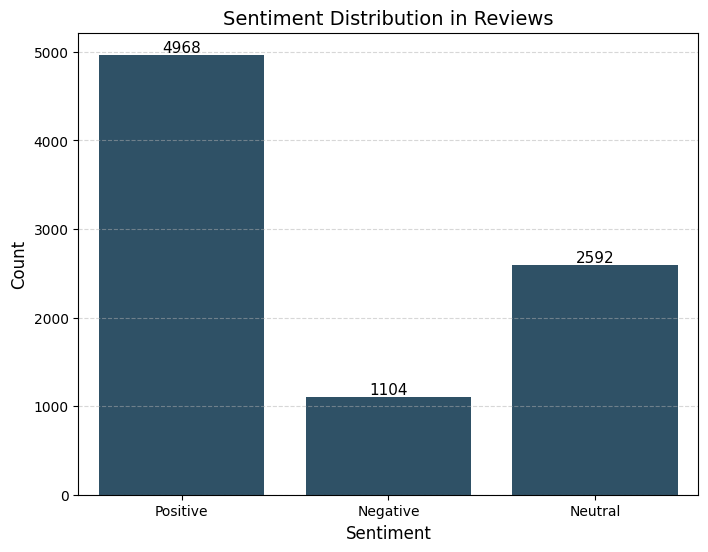

In [ ]:
# Plot the sentiment count
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="review_comment_message_clean_sentiment", data=nlp_df)

# Add labels and title
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Sentiment Distribution in Reviews", fontsize=14)

# Display value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Reduce gridline visibility for a cleaner look
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.5)

plt.show()

# Data Preprocessing

In [ ]:
# Separate Features and Labels
X = nlp_df['review_comment_message'] # Text column
y = nlp_df['review_comment_message_clean_sentiment'] # Target column

In [ ]:
# Train / Test Split
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Encoding
# Convert categorical classes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check if the conversion was successful
print(f"Unique values ​​in y_train_encoded after encoding: {y_train_encoded}")

# Viewing
label_encoder

Unique values ​​in y_train_encoded after encoding: [1 2 2 ... 2 1 2]


LabelEncoder()

In [ ]:
# Vectorization with Tfidf
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) # Optional limit for the number of features

# Transform texts into TF-IDF vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert to dense arrays (if necessary for some models)
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Viewing
vectorizer

TfidfVectorizer(max_features=5000)

# Machine Learning

In [ ]:
# Model Training and Accuracy
%%time

# Initialize models
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=50, max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=45),
    "XGBClassifier": XGBClassifier(random_state=42),
    "LGBMClassifier": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9,
                                     learning_rate=0.05, feature_fraction=0.9, bagging_freq=50,
                                     verbosity=-1, verbose=50),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(kernel='linear', random_state=42, probability=True),
    "CatBoostClassifier": CatBoostClassifier(verbose=0, random_state=42)
}

# Train models and calculate accuracy scores
results = []
for name, model in models.items():
    model.fit(X_train_dense, y_train_encoded)
    train_accuracy = accuracy_score(y_train_encoded, model.predict(X_train_dense))
    test_accuracy = accuracy_score(y_test_encoded, model.predict(X_test_dense))
    results.append({"Model": name, "Training Accuracy": train_accuracy, "Testing Accuracy": test_accuracy})

pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: user 24min 42s, sys: 14.2 s, total: 24min 56s
Wall time: 22min 34s


Model  Training Accuracy  Testing Accuracy
0                   GaussianNB           0.554177          0.356607
1       DecisionTreeClassifier           0.999711          0.830352
2       RandomForestClassifier           0.999711          0.834968
3           LogisticRegression           0.936084          0.868436
4           AdaBoostClassifier           0.826865          0.813041
5                XGBClassifier           0.951811          0.879977
6               LGBMClassifier           0.920502          0.877669
7         KNeighborsClassifier           0.556197          0.510675
8   GradientBoostingClassifier           0.881114          0.848817
9                          SVC           0.958592          0.888055
10          CatBoostClassifier           0.930313          0.885747

<ipython-input-51-4d7fe1850837>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
<ipython-input-51-4d7fe1850837>:11: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


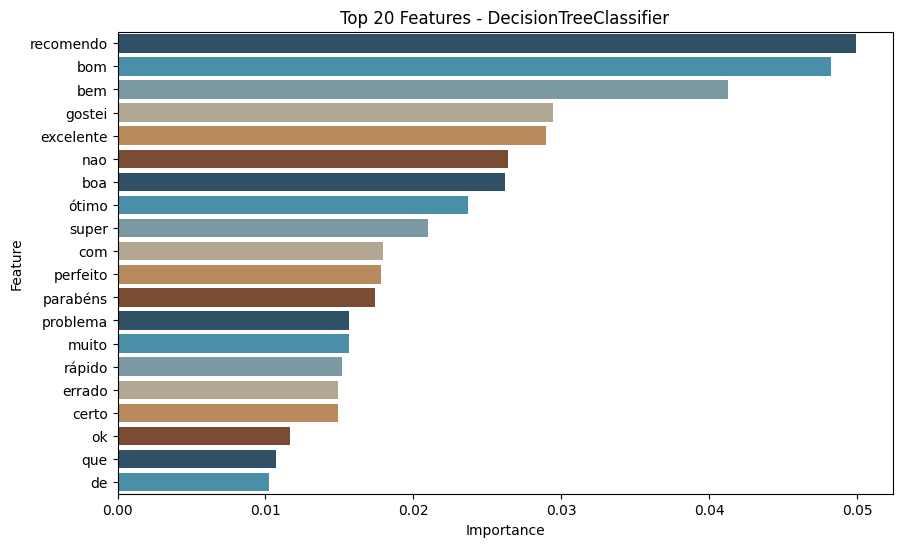

<ipython-input-51-4d7fe1850837>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
<ipython-input-51-4d7fe1850837>:11: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


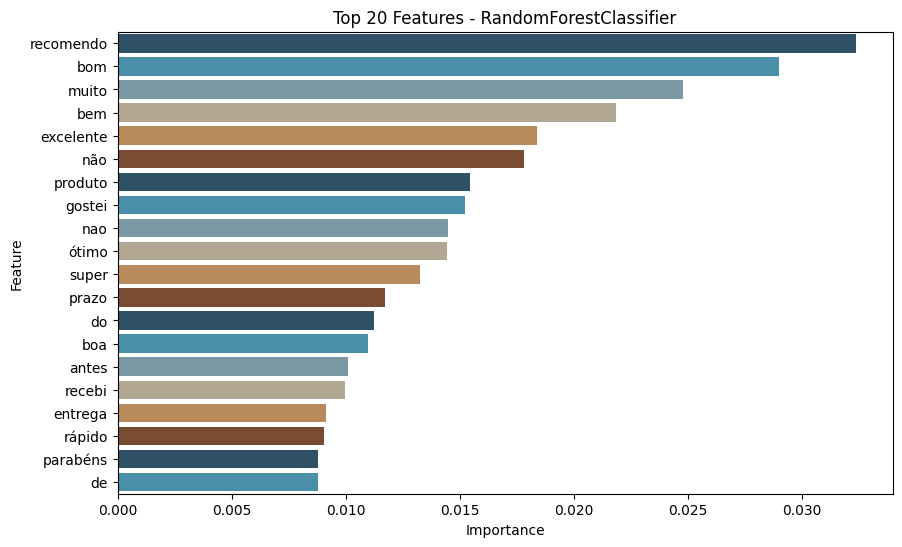

<ipython-input-51-4d7fe1850837>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
<ipython-input-51-4d7fe1850837>:11: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


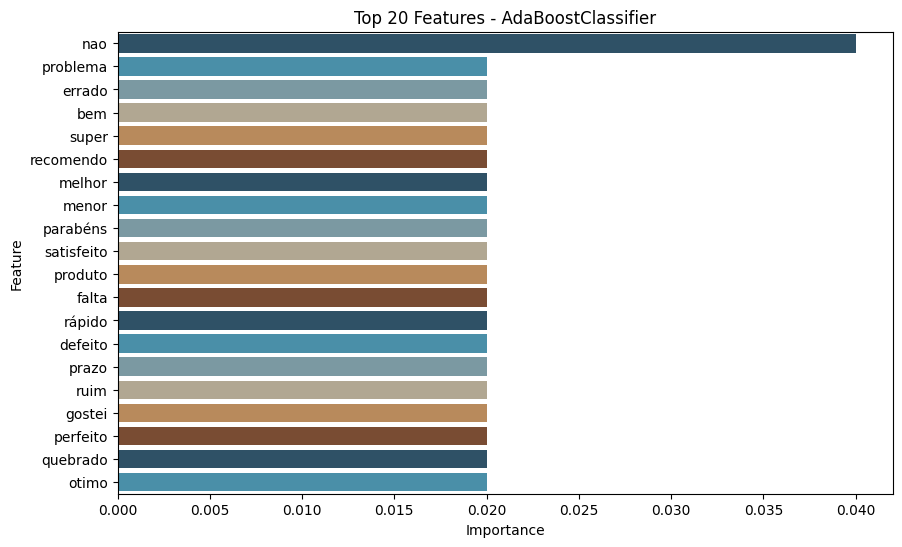

<ipython-input-51-4d7fe1850837>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
<ipython-input-51-4d7fe1850837>:11: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


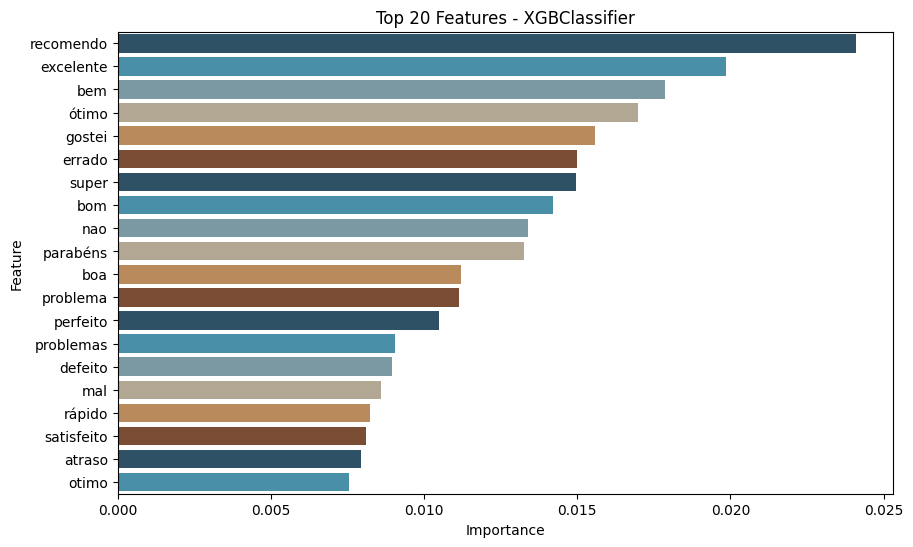

<ipython-input-51-4d7fe1850837>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
<ipython-input-51-4d7fe1850837>:11: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


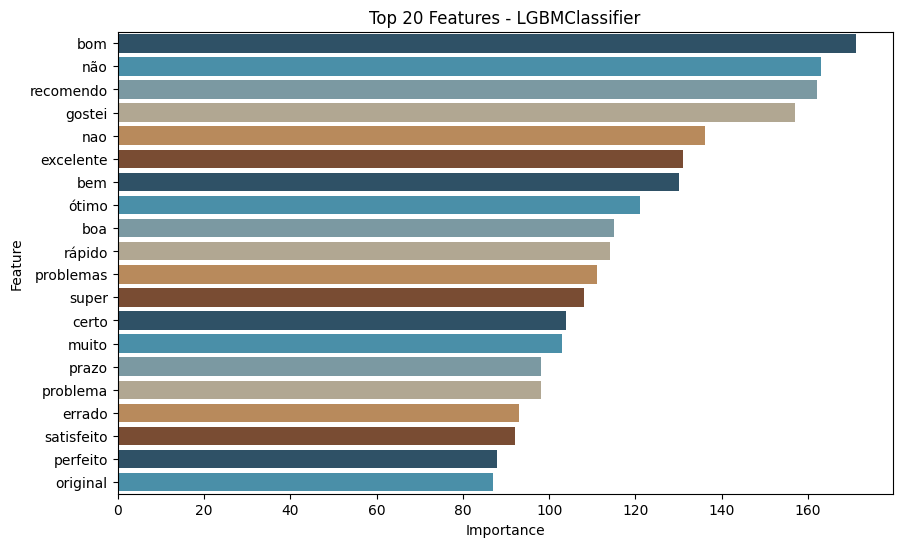

<ipython-input-51-4d7fe1850837>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
<ipython-input-51-4d7fe1850837>:11: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


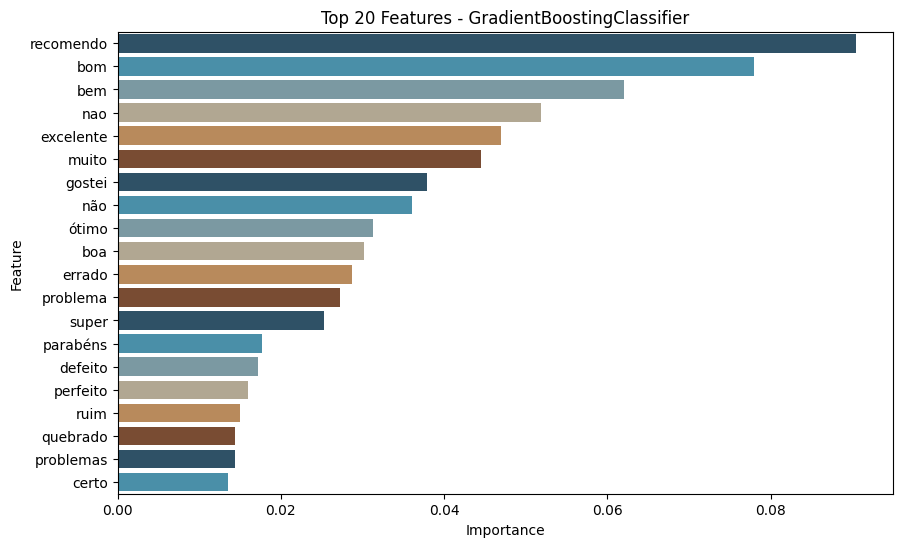

<ipython-input-51-4d7fe1850837>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
<ipython-input-51-4d7fe1850837>:11: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)


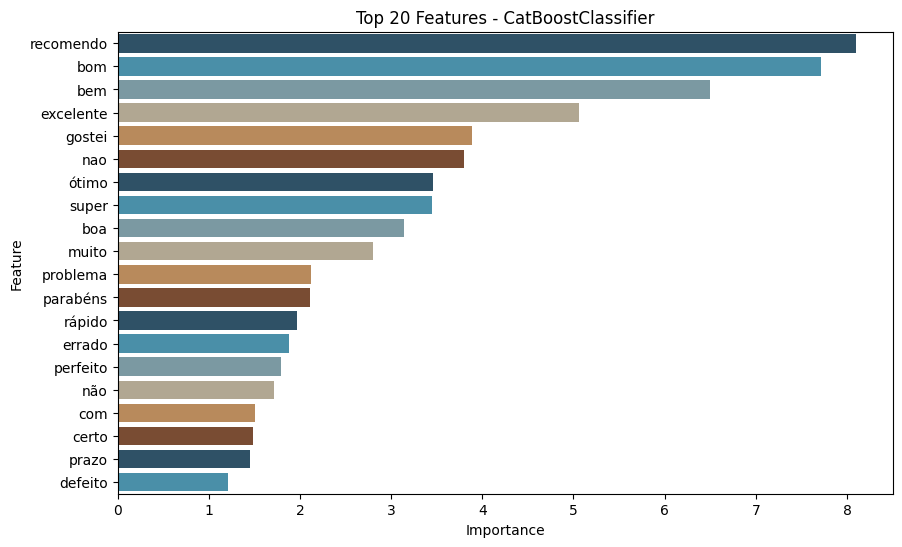

In [ ]:
# Feature Importances (for the models supporting it)
feature_importances = []
feature_names = vectorizer.get_feature_names_out()

for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False).head(20)

        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importance", y="Feature", data=imp_df, palette=colors)
        plt.title(f"Top 20 Features - {name}")
        plt.show()

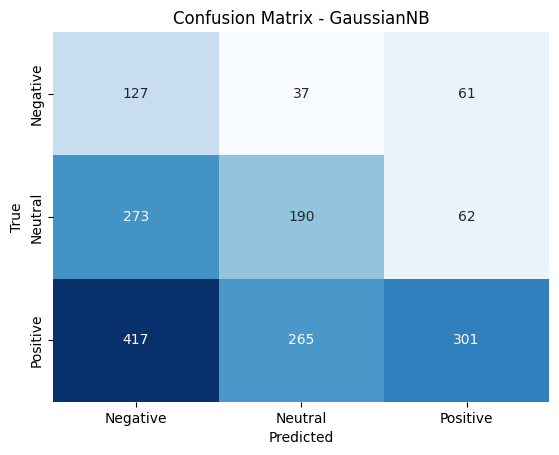

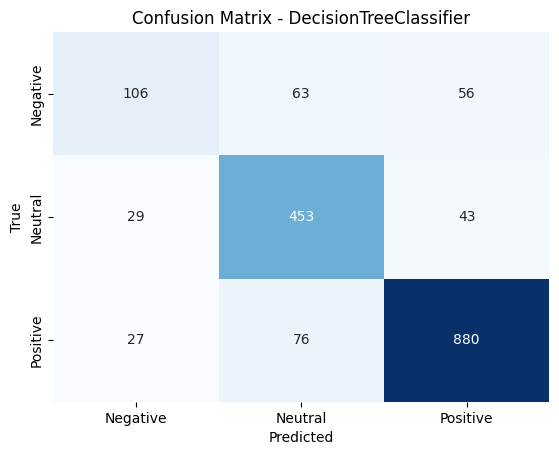

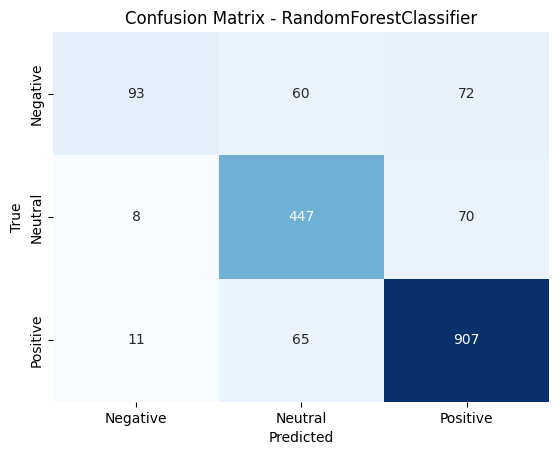

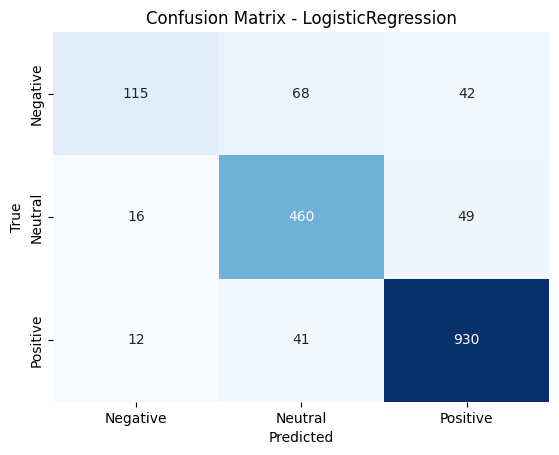

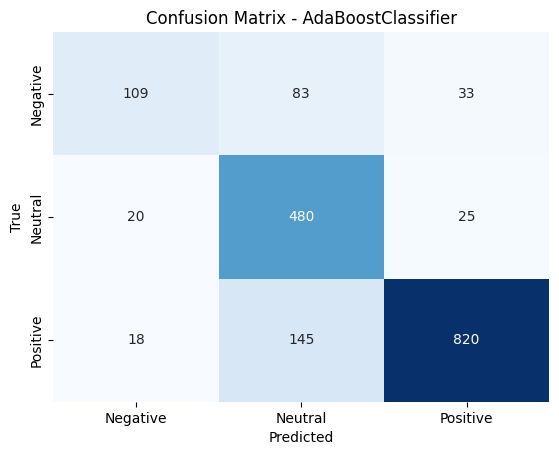

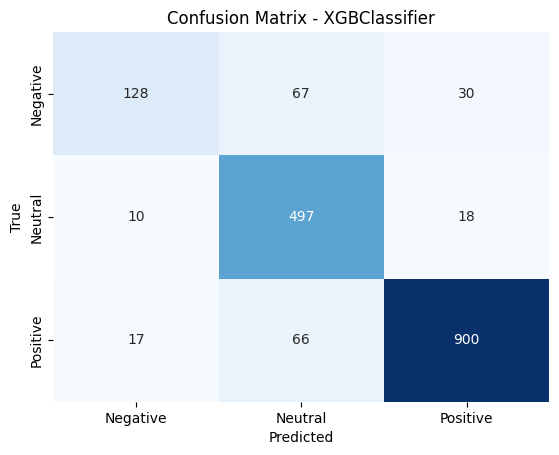

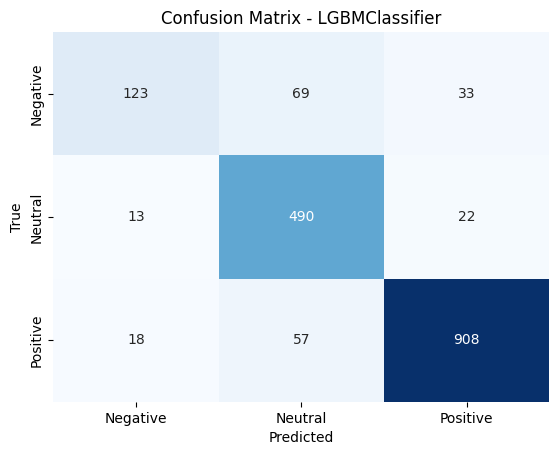

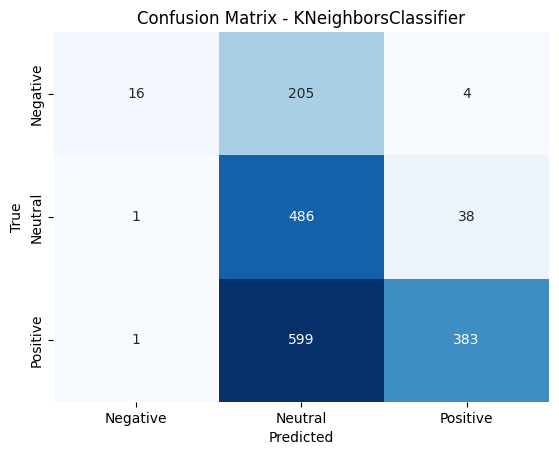

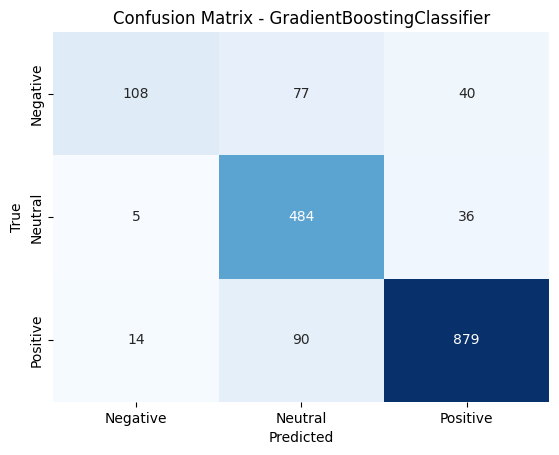

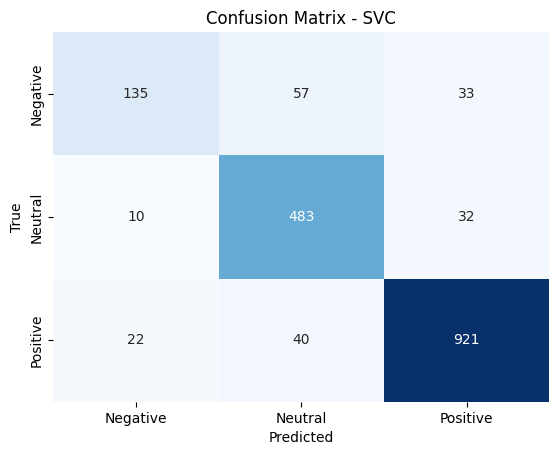

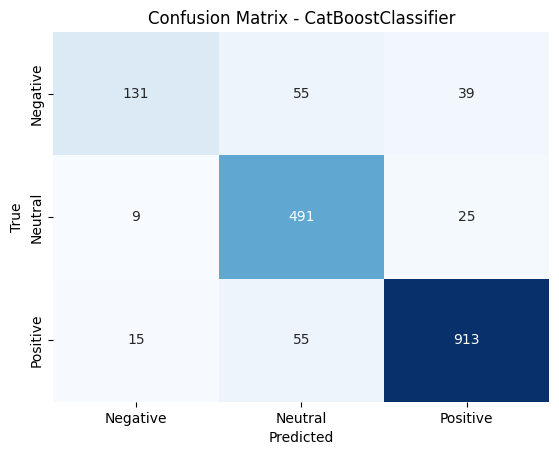

In [ ]:
# Confusion Matrix
# Confusion matrix plots
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    cm = confusion_matrix(y_test_encoded, y_pred)

    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

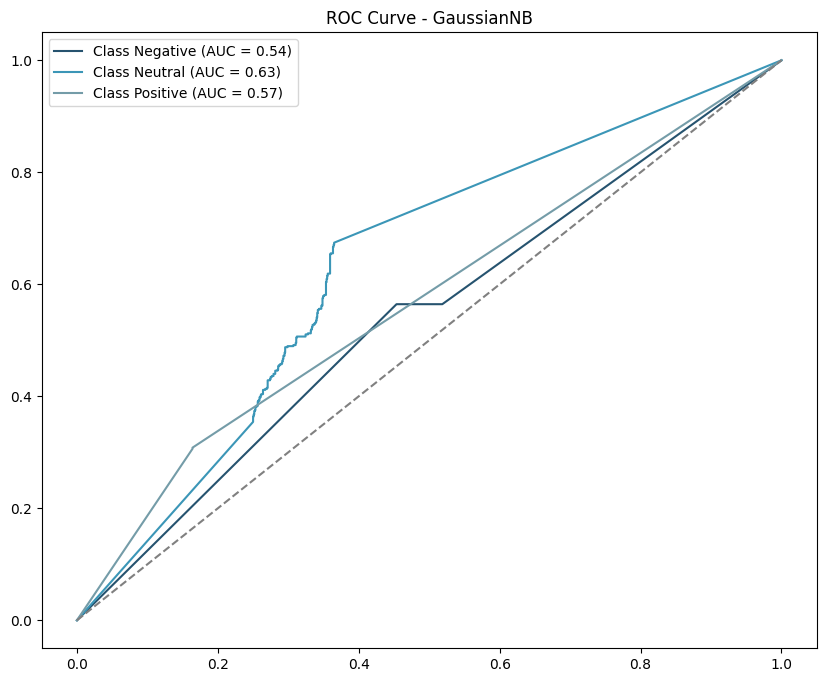

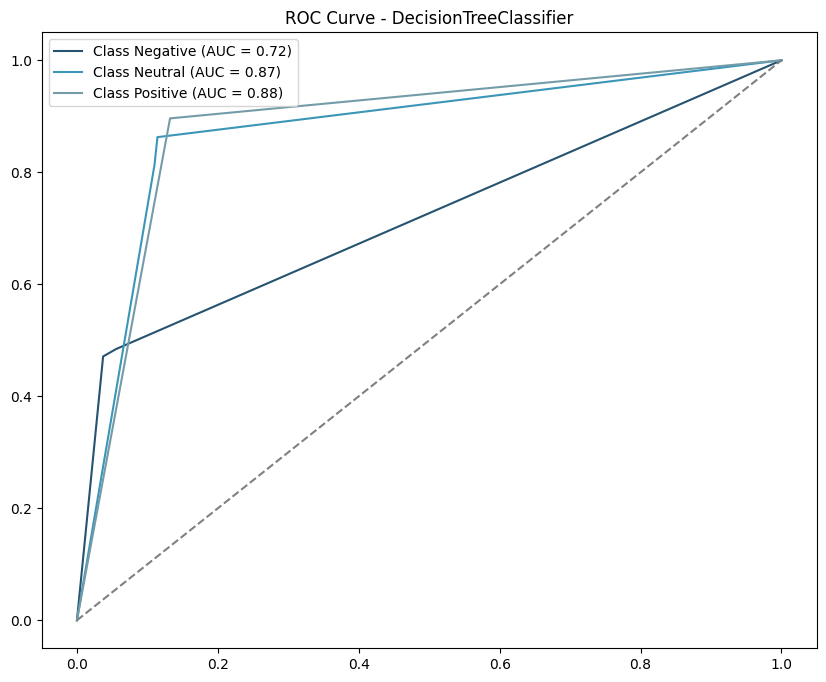

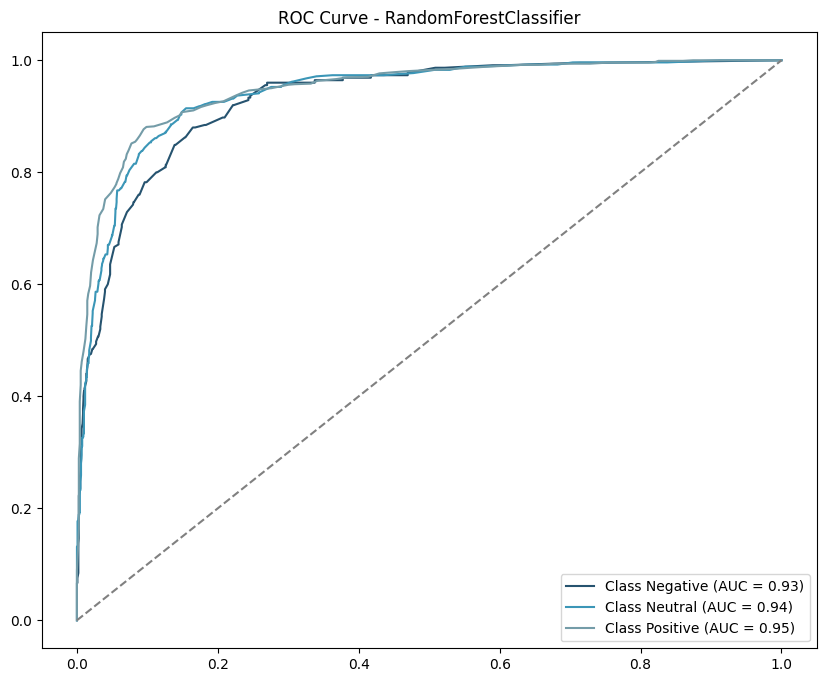

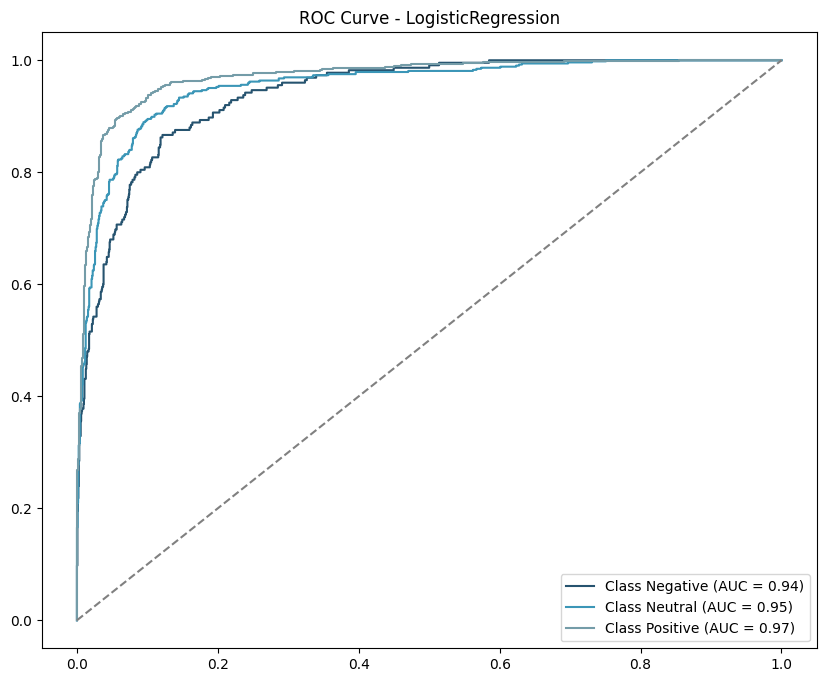

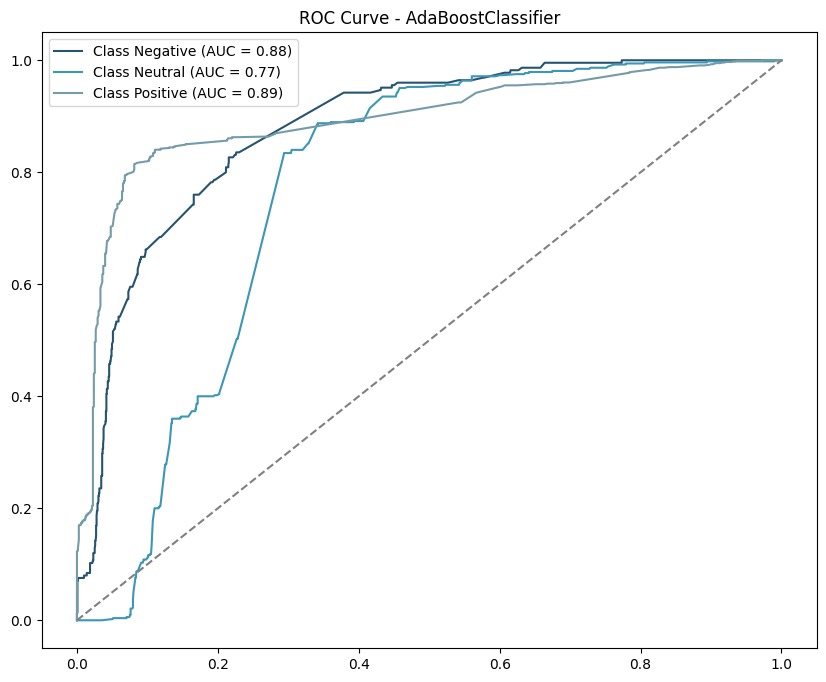

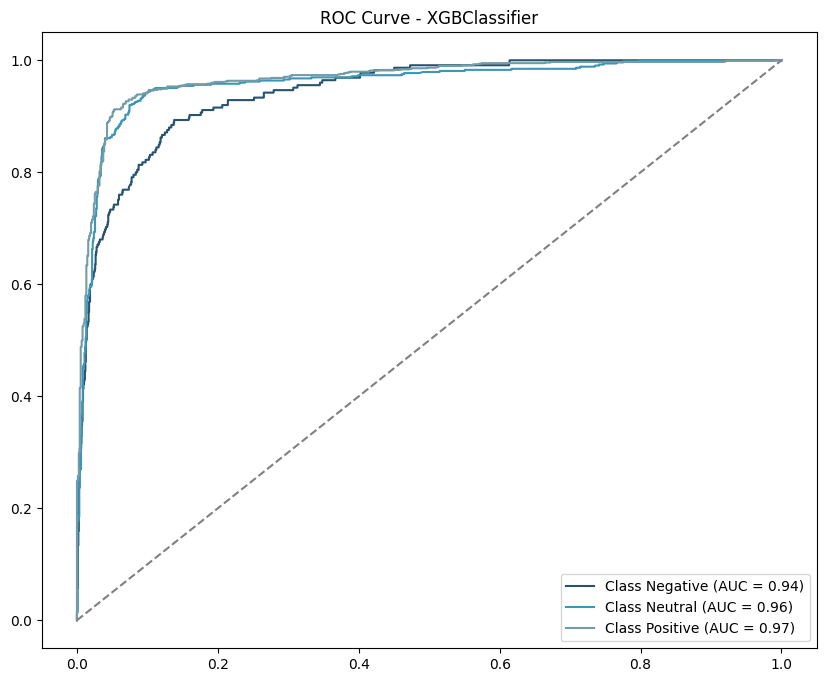

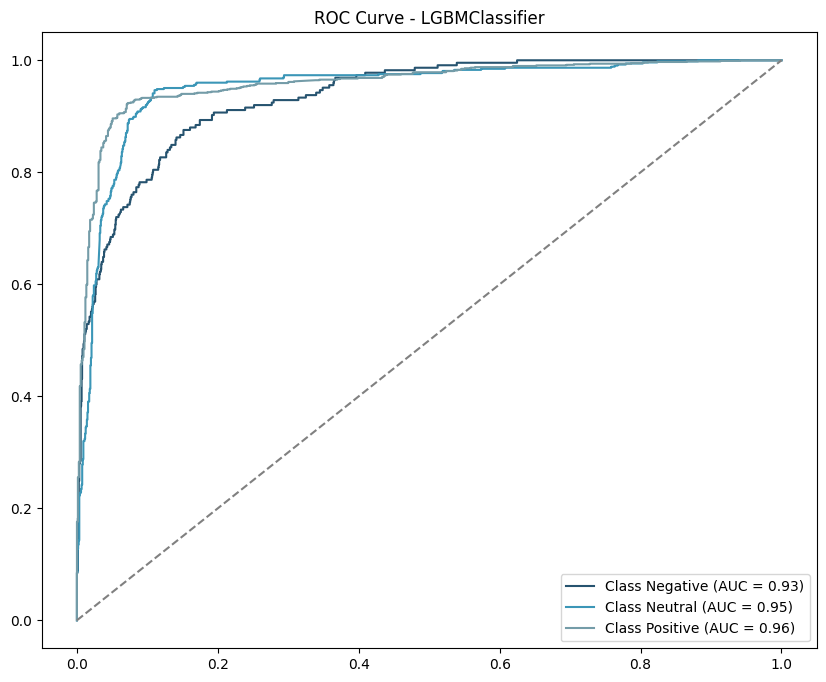

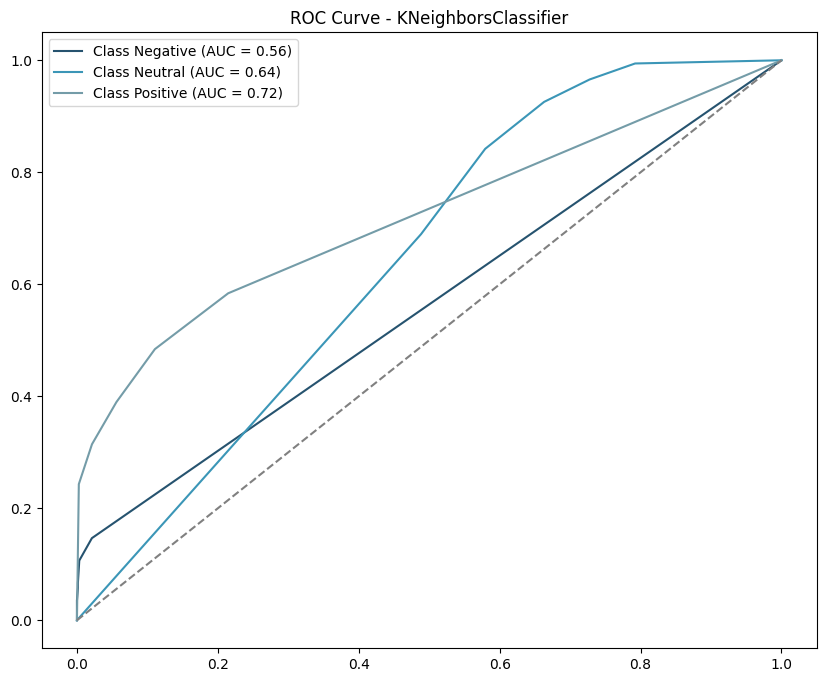

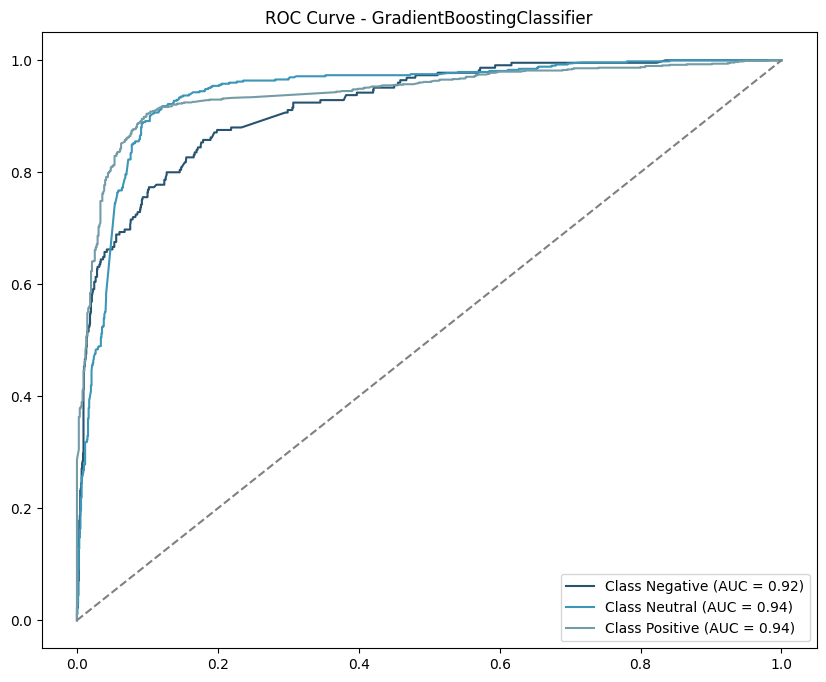

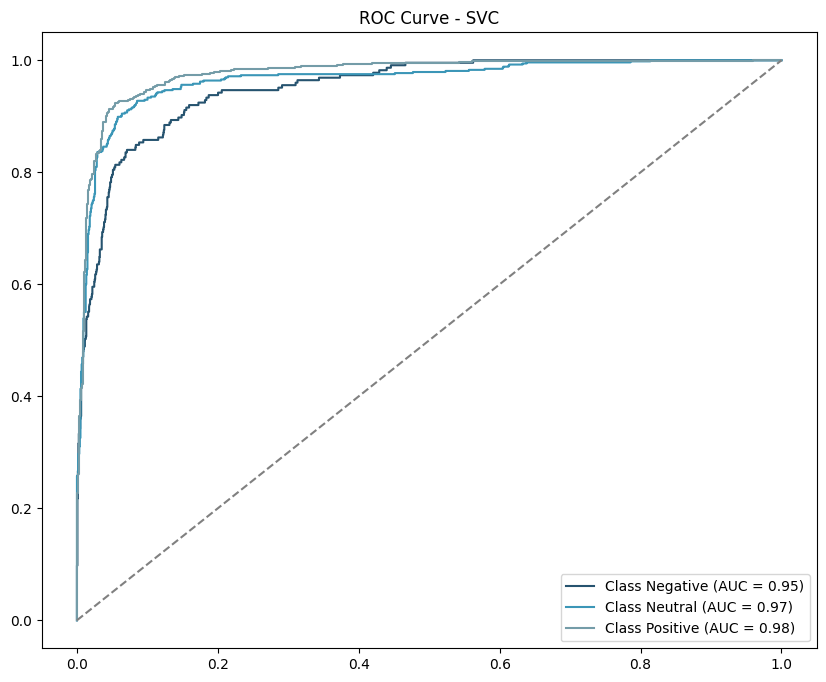

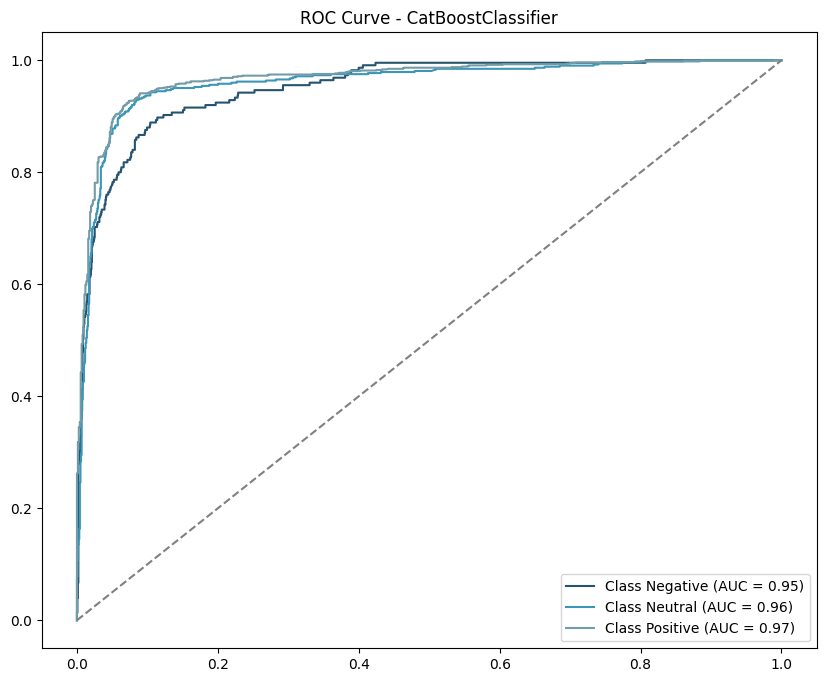

In [ ]:
# ROC Curves
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
n_classes = y_test_binarized.shape[1]

for name, model in models.items():
    plt.figure(figsize=(10, 8))

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_dense)
    else:
        y_decision = model.decision_function(X_test_dense)
        y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

    for class_id in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

In [ ]:
# Classification Report
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    print(f"Classification Report for {name}")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

Classification Report for GaussianNB
              precision    recall  f1-score   support

    Negative       0.16      0.56      0.24       225
     Neutral       0.39      0.36      0.37       525
    Positive       0.71      0.31      0.43       983

    accuracy                           0.36      1733
   macro avg       0.42      0.41      0.35      1733
weighted avg       0.54      0.36      0.39      1733

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

    Negative       0.65      0.47      0.55       225
     Neutral       0.77      0.86      0.81       525
    Positive       0.90      0.90      0.90       983

    accuracy                           0.83      1733
   macro avg       0.77      0.74      0.75      1733
weighted avg       0.83      0.83      0.83      1733

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

    Negative       0.83      0.41      0.55     

In [ ]:
# Performance Data Collection and Highlighting
# Collect performance metrics
performance_data = []
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test_encoded, y_pred),
        "Precision": precision_score(y_test_encoded, y_pred, average='weighted'),
        "Recall": recall_score(y_test_encoded, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test_encoded, y_pred, average='weighted')
    }
    performance_data.append(metrics)

# Convert list of dictionaries to DataFrame
performance_df = pd.DataFrame(performance_data)

# Apply highlight to numeric columns only
highlighted_df = (
    performance_df.style
    .highlight_max(
        subset=performance_df.select_dtypes(include='number').columns,  # Only numeric columns
        color="lightblue",
        axis=0
    )
)

# Display the styled DataFrame
highlighted_df